### Lead Scoring Case Assignment

In [1]:
# import required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import wrap
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
#loading the data
leads_data=pd.read_csv('Leads.csv')

In [3]:
#previewing the data
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Understanding data 

In [4]:
#preview the shape of data
leads_data.shape

(9240, 37)

In [5]:
#preview info the data
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [6]:
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
#Converting select values to Null as the don't give any information or default values
#So treating them as Null
leads_data_corrected=leads_data.replace('Select',np.nan)

In [8]:
#check for missing values in after replacement
round(leads_data_corrected.isnull().sum()/(len(leads_data.index))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [9]:
#Columns having more than 70% missing values
leads_data_corrected.columns[round(leads_data_corrected.isnull().sum()/(len(leads_data.index))*100,2)>70]

Index(['How did you hear about X Education', 'Lead Profile'], dtype='object')

In [10]:
#Droping column having more than 70% missing values
leads_data_corrected.drop(leads_data_corrected.columns[round(leads_data_corrected.isnull().sum()/
          (len(leads_data.index))*100,2)>70],axis=1,inplace=True)

In [11]:
#check for missing values in after droping
round(leads_data_corrected.isnull().sum()/(len(leads_data.index))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

### Missing Value Treatment

In [12]:
#Lead Quality 

In [13]:
#count of categories in Lead Quality
leads_data_corrected['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

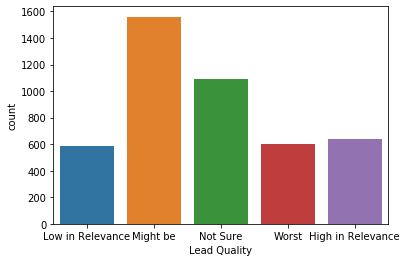

In [14]:
#count plot
sns.countplot('Lead Quality',data=leads_data_corrected)

In [15]:
# we have not sure value, we can impute missing values to Not Sure 

In [16]:
leads_data_corrected['Lead Quality']=leads_data_corrected['Lead Quality'].replace(np.nan,'Not Sure')

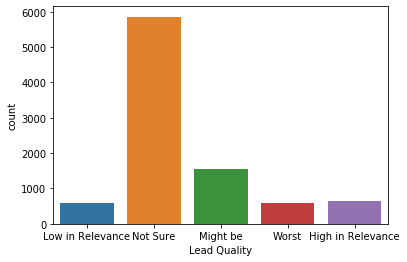

In [17]:
#count plot after imputing
sns.countplot('Lead Quality',data=leads_data_corrected)

In [18]:
#counts
leads_data_corrected['Lead Quality'].value_counts()

Not Sure             5859
Might be             1560
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [19]:
#check for missing values in after conversion
round(leads_data_corrected.isnull().sum()/(len(leads_data.index))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [20]:
#Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score

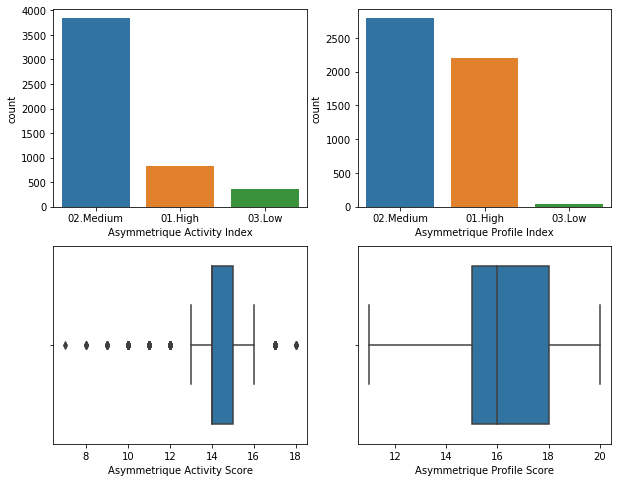

In [21]:
fig,(ax1,ax2)=plt.subplots(nrows=2,ncols=2,figsize=(10,8))
sns.countplot('Asymmetrique Activity Index',data=leads_data_corrected,ax=ax1[0])
sns.countplot('Asymmetrique Profile Index',data=leads_data_corrected,ax=ax1[1])
sns.boxplot('Asymmetrique Activity Score',data=leads_data_corrected,ax=ax2[0])
sns.boxplot('Asymmetrique Profile Score',data=leads_data_corrected,ax=ax2[1])

In [22]:
# As the above plots shows these columns have high spread and no suitable pattern to impute the values
# Since we can't decide on imputing and has more than 45% missing values
# droping these columns
leads_data_corrected.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1,inplace=True)

In [23]:
#check for missing values in after conversion
round(leads_data_corrected.isnull().sum()/(len(leads_data.index))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [24]:
#City

In [25]:
#counts of categories
leads_data_corrected['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

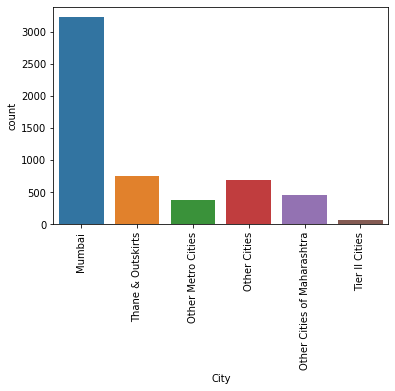

In [26]:
#count plot of city column
ax=sns.countplot('City',data=leads_data_corrected)
plt.xticks(rotation=90)
plt.show()

In [27]:
#Imputing the missing values of city column(categorical variable) with mode value

In [28]:
leads_data_corrected['City']=leads_data_corrected['City'].replace(np.nan,'Mumbai')

In [29]:
#check for missing values in after conversion
round(leads_data_corrected.isnull().sum()/(len(leads_data.index))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [30]:
#Tags

In [31]:
#counts of categories in Tags
leads_data_corrected['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

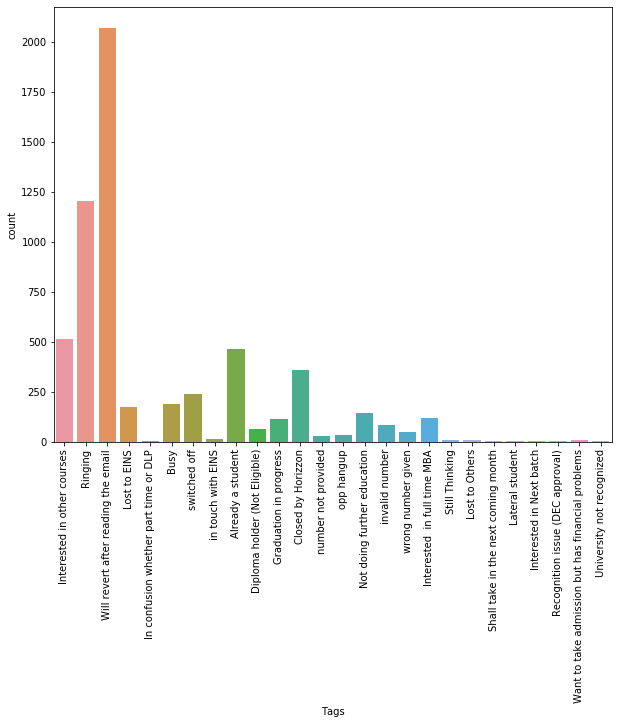

In [32]:
plt.figure(figsize=(10,8))
ax=sns.countplot('Tags',data=leads_data_corrected)
plt.xticks(rotation=90)
plt.show()

In [33]:
# replace nan with others to find the conversion percentage and assign it the tags which as similar conversion percentage
leads_data_corrected['Tags']=leads_data_corrected['Tags'].replace(np.nan,'Others')

In [34]:
#check for conversion rates
dis={}
dis['Count']=leads_data_corrected.groupby('Tags').count()['Converted']
dis['Converted']=leads_data_corrected.groupby('Tags').sum()['Converted']
dis['%Converted']=100*leads_data_corrected.groupby('Tags').sum()['Converted']/leads_data_corrected.groupby('Tags').count()['Converted']
pd.DataFrame(dis)

,Count,Converted,%Converted
Tags,,,
Already a student,465,3,0.645161
Busy,186,105,56.451613
Closed by Horizzon,358,356,99.441341
Diploma holder (Not Eligible),63,1,1.587302
Graduation in progress,111,7,6.306306
In confusion whether part time or DLP,5,1,20.000000
Interested in full time MBA,117,3,2.564103
Interested in Next batch,5,5,100.000000
Interested in other courses,513,13,2.534113


In [35]:
# missing values have similar conversion% as in touch with EINS so replcaing others(missing values) with EINS 

In [36]:
leads_data_corrected['Tags']=leads_data_corrected['Tags'].replace('Others','in touch with EINS')

In [37]:
#check for missing values
round(leads_data_corrected.isnull().sum()/(len(leads_data.index))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [38]:
#counts of categories in Specialization
leads_data_corrected['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

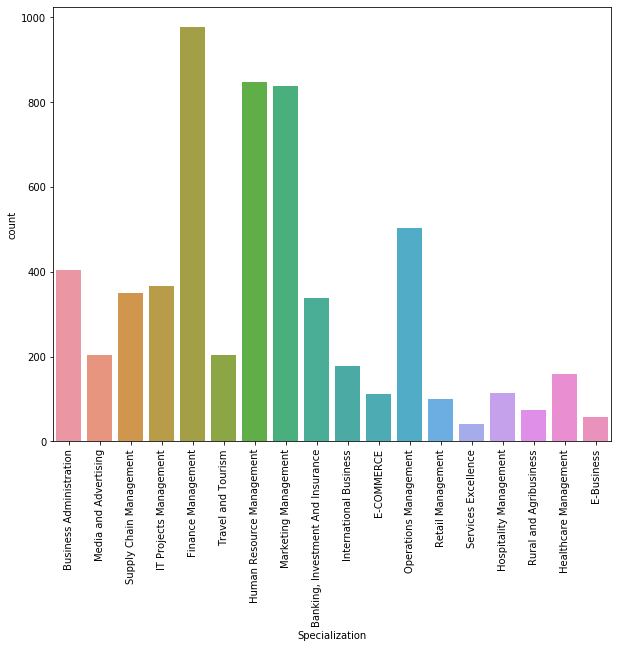

In [39]:
#count plot of specialization
plt.figure(figsize=(10,8))
ax=sns.countplot('Specialization',data=leads_data_corrected)
plt.xticks(rotation=90)
plt.show()

In [40]:
#replacing all the missing values with a name otherspec to calculate conversion rate
leads_data_corrected['Specialization']=leads_data_corrected['Specialization'].replace(np.nan,'Otherspec')

In [41]:
#conversion rate
dis={}
dis['Count']=leads_data_corrected.groupby('Specialization').count()['Converted']
dis['Converted']=leads_data_corrected.groupby('Specialization').sum()['Converted']
dis['%Converted']=100*leads_data_corrected.groupby('Specialization').sum()['Converted']/leads_data_corrected.groupby('Specialization').count()['Converted']
pd.DataFrame(dis)

,Count,Converted,%Converted
Specialization,,,
"Banking, Investment And Insurance",338,167,49.408284
Business Administration,403,179,44.416873
E-Business,57,21,36.842105
E-COMMERCE,112,40,35.714286
Finance Management,976,436,44.672131
Healthcare Management,159,79,49.685535
Hospitality Management,114,48,42.105263
Human Resource Management,848,388,45.754717
IT Projects Management,366,140,38.251366


In [42]:
## imputing the missing values to Other as user might left it blank as they can't see their specialization in the give list

In [43]:
leads_data_corrected['Specialization']=leads_data_corrected['Specialization'].replace(np.nan,'Others')

In [44]:
#check for missing values 
round(leads_data_corrected.isnull().sum()/(len(leads_data.index))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [45]:
#What matters most to you in choosing a course

In [46]:
#counts of categories in What matters most to you in choosing a course
leads_data_corrected['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

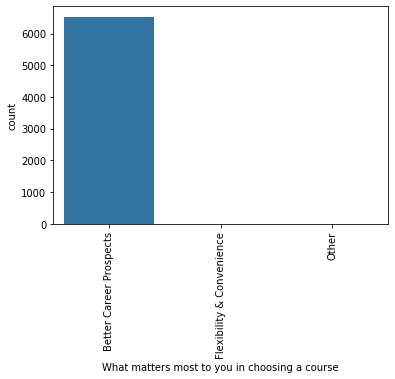

In [47]:
#count plot
sns.countplot('What matters most to you in choosing a course',data=leads_data_corrected)
plt.xticks(rotation=90)
plt.show()

In [48]:
##imputing missing values with Better Career Prospects(Mode)

In [49]:
leads_data_corrected['What matters most to you in choosing a course']=leads_data_corrected['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

In [50]:
#check for missing values
round(leads_data_corrected.isnull().sum()/(len(leads_data.index))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [51]:
#What is your current occupation

In [52]:
#counts of categories in What is your current occupation
leads_data_corrected['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [53]:
##imputing missing values with mode(Unemployed)

In [54]:
leads_data_corrected['What is your current occupation']=leads_data_corrected['What is your current occupation'].replace(np.nan,'Unemployed')

In [55]:
#check for missing values in after conversion
round(leads_data_corrected.isnull().sum()/(len(leads_data.index))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [56]:
#counts of categories in Country
leads_data_corrected['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
South Africa               4
Kuwait                     4
Germany                    4
Canada                     4
Nigeria                    4
Sweden                     3
Netherlands                2
Uganda                     2
Bangladesh                 2
China                      2
Philippines                2
Ghana                      2
Belgium                    2
Asia/Pacific Region        2
Italy                      2
Russia                     1
Tanzania                   1
Malaysia                   1
Liberia                    1
Vietnam                    1
Sri Lanka                  1
Switzerland   

In [57]:
##imputing missing values with Mode of the column (India)

In [58]:
leads_data_corrected['Country']=leads_data_corrected['Country'].replace(np.nan,'India')

In [59]:
#check for missing values
round(leads_data_corrected.isnull().sum()/(len(leads_data.index))*100,2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [60]:
# As the percentage of missing values is less lets drop na from data

In [61]:
#counts of categories in Last Activity
leads_data_corrected['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [62]:
# imputing with Mode(Email Opened)

In [63]:
leads_data_corrected['Last Activity']=leads_data_corrected['Last Activity'].replace(np.nan,'Email Opened')

In [64]:
#check for missing values
round(leads_data_corrected.isnull().sum()/(len(leads_data.index))*100,2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

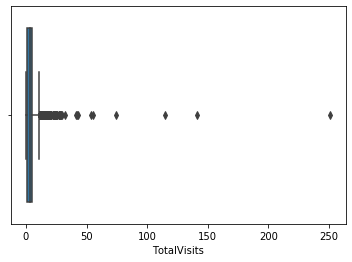

In [65]:
sns.boxplot('TotalVisits',data=leads_data_corrected)

In [66]:
#As spread is high droping the rows

In [67]:
leads_data_corrected.shape

(9240, 31)

In [68]:
leads_data_corrected.dropna().shape

(9074, 31)

In [69]:
100*(166/9074)

1.8294026890015427

In [70]:
leads_data_corrected.dropna(inplace=True)

In [71]:
#check for missing values in after conversion
round(leads_data_corrected.isnull().sum()/(len(leads_data.index))*100,2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

### Univariant Analysis

In [72]:
#created a function 
'''input-> column, dataframe(optional), rotation(optional), figsize(optional) and type of plot(optional) paramteres
    return dataframe having conversion rate and plots box or count plot
'''
def conversion_percent(col,dataframe=leads_data_corrected,rotation=0,figsize=(6,4),plot='count'):
    if(plot=='box'):
        sns.boxplot(y=col,x='Converted',data=dataframe)
    elif(plot=='count'):
        plt.figure(figsize=figsize)
        sns.countplot(col,hue='Converted',data=dataframe)
        plt.xticks(rotation=rotation)
    dis={}
    dis['Count']=leads_data_corrected.groupby(col).count()['Converted']
    dis['Converted']=leads_data_corrected.groupby(col).sum()['Converted']
    dis['%Converted']=100*leads_data_corrected.groupby(col).sum()['Converted']/leads_data_corrected.groupby(col).count()['Converted']
    print(pd.DataFrame(dis))

                         Count  Converted  %Converted
Lead Origin                                          
API                       3578       1115   31.162661
Landing Page Submission   4885       1767   36.171955
Lead Add Form              581        544   93.631670
Lead Import                 30          9   30.000000


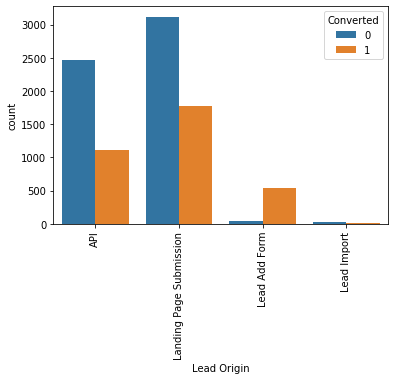

In [73]:
#conversion plot
conversion_percent('Lead Origin',leads_data_corrected,90)

In [74]:
#Lead identified by Add Form has more conversion rate
# Leads identification is high for API and landing Page Submission but low conversion rate

                   Count  Converted  %Converted
Lead Source                                    
Click2call             4          3   75.000000
Direct Traffic      2543        818   32.166732
Facebook              31          9   29.032258
Google              2868       1147   39.993026
Live Chat              2          2  100.000000
NC_EDM                 1          1  100.000000
Olark Chat          1753        448   25.556189
Organic Search      1154        436   37.781629
Pay per Click Ads      1          0    0.000000
Press_Release          2          0    0.000000
Reference            443        410   92.550790
Referral Sites       125         31   24.800000
Social Media           2          1   50.000000
WeLearn                1          1  100.000000
Welingak Website     129        127   98.449612
bing                   6          1   16.666667
blog                   1          0    0.000000
google                 5          0    0.000000
testone                1          0    0

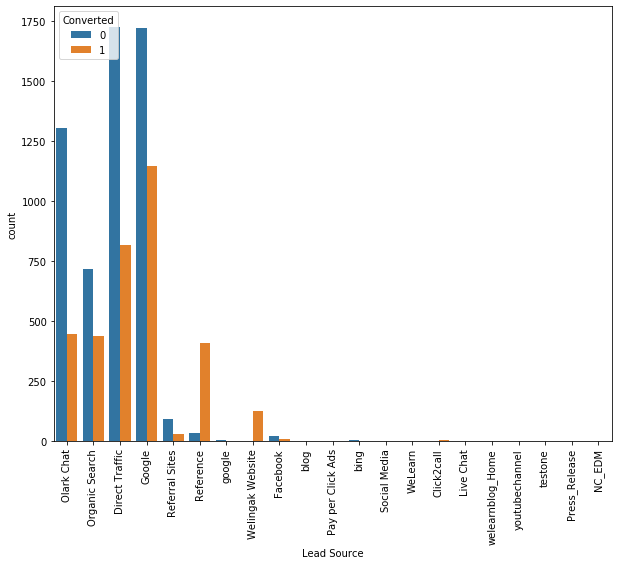

In [75]:
#conversion plot
conversion_percent('Lead Source',rotation=90,figsize=(10,8))

In [76]:
#correcting google to Google
leads_data_corrected['Lead Source']=leads_data_corrected['Lead Source'].replace('google','Google')

In [77]:
leads_data_corrected.groupby('Lead Source').count()[leads_data_corrected.groupby('Lead Source').
                                                    count()['Converted']<10].index

Index(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads',
       'Press_Release', 'Social Media', 'WeLearn', 'bing', 'blog', 'testone',
       'welearnblog_Home', 'youtubechannel'],
      dtype='object', name='Lead Source')

In [78]:
# Reducing the number categories by grouping all the small sources(<10) to Others 
leads_data_corrected['Lead Source']=leads_data_corrected['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads',
       'Press_Release', 'Social Media', 'WeLearn', 'bing', 'blog', 'google',
       'testone', 'welearnblog_Home', 'youtubechannel'],'Others')

                  Count  Converted  %Converted
Lead Source                                   
Direct Traffic     2543        818   32.166732
Facebook             31          9   29.032258
Google             2873       1147   39.923425
Olark Chat         1753        448   25.556189
Organic Search     1154        436   37.781629
Others               23          9   39.130435
Reference           443        410   92.550790
Referral Sites      125         31   24.800000
Welingak Website    129        127   98.449612


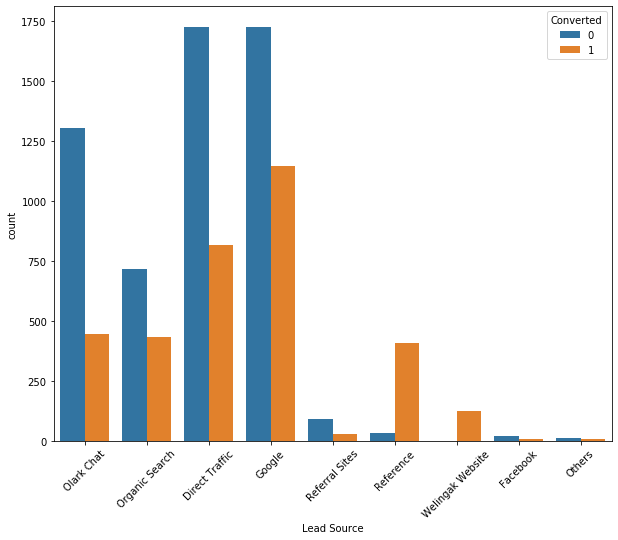

In [79]:
#conversion plot
conversion_percent('Lead Source',figsize=(10,8),rotation=45)

In [80]:
### Conversion rate is high for leads from Welingak Website and Reference
##Lead source is high from Direct Traffic, Google, Olark Chat, Organic Search but conversion rate is low (<40%)

              Count  Converted  %Converted
Do Not Email                              
No             8358       3331   39.854032
Yes             716        104   14.525140


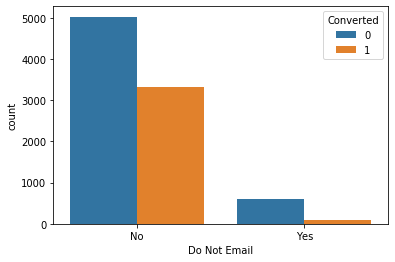

In [81]:
conversion_percent('Do Not Email')

In [82]:
## Conversion rate is high from leads choosing Do not email as Yes 

             Count  Converted  %Converted
Do Not Call                              
No            9072       3433   37.841711
Yes              2          2  100.000000


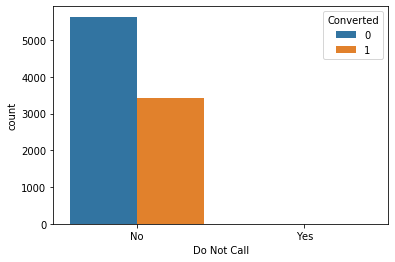

In [83]:
conversion_percent('Do Not Call')

In [84]:
## Conversion rate is high from leads choosing Do not Call as Yes but numbers is low

In [85]:
leads_data_corrected['TotalVisits'].describe(percentiles=[0.05,0.15,0.25,0.50,0.75,0.90,0.99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
15%         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

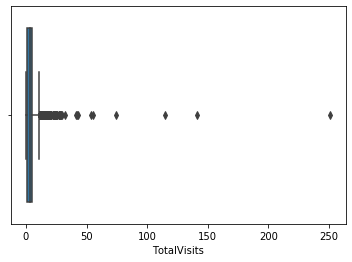

In [86]:
sns.boxplot('TotalVisits',data=leads_data_corrected)

In [87]:
## Above box plot shows there are outliers in Total visits so treating them 

In [88]:
#replacing lower values less than 5 percentile to 5 percentile value
percentile_5=np.percentile(leads_data_corrected['TotalVisits'],5)
leads_data_corrected['TotalVisits'][leads_data_corrected['TotalVisits']<percentile_5]=percentile_5

In [89]:
#replacing lower values more than 95 percentile to 95 percentile
percentile_95=np.percentile(leads_data_corrected['TotalVisits'],95)
leads_data_corrected['TotalVisits'][leads_data_corrected['TotalVisits']>percentile_95]=percentile_95

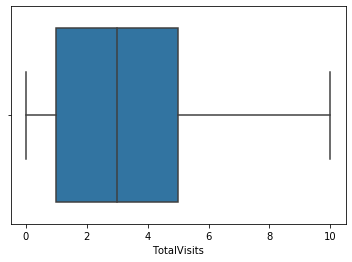

In [90]:
#box plot after treating outliers
sns.boxplot('TotalVisits',data=leads_data_corrected)

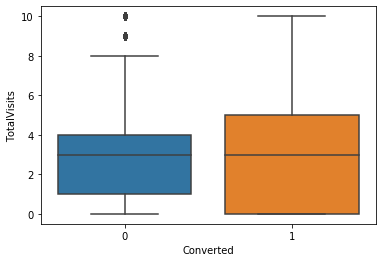

In [91]:
sns.boxplot('Converted','TotalVisits',data=leads_data_corrected)

In [92]:
#Nothing can be infered from this plot

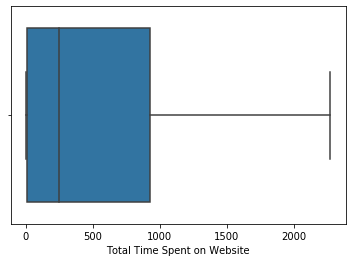

In [93]:
#box plot of total time spent on website
sns.boxplot('Total Time Spent on Website',data=leads_data_corrected)

In [94]:
# #replacing lower values more than 05 percentile to 05 percentile
# percentile_5=np.percentile(leads_data_corrected['Total Time Spent on Website'],5)
# leads_data_corrected['Total Time Spent on Website'][leads_data_corrected['Total Time Spent on Website']<percentile_5]=percentile_5

In [95]:
# #replacing lower values more than 95 percentile to 95 percentile
# percentile_95=np.percentile(leads_data_corrected['Total Time Spent on Website'],95)
# leads_data_corrected['Total Time Spent on Website'][leads_data_corrected['Total Time Spent on Website']>percentile_95]=percentile_95

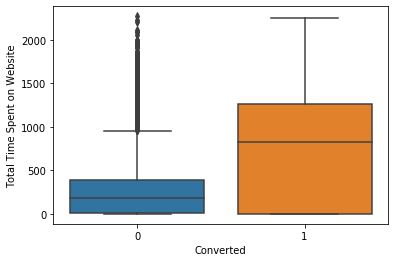

In [96]:
sns.boxplot('Converted','Total Time Spent on Website',data=leads_data_corrected)

In [97]:
#leads spending more time are more likely to convert

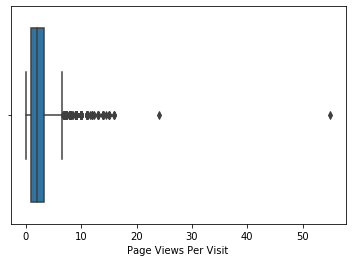

In [98]:
#box plot of Page Views Per Visit
sns.boxplot('Page Views Per Visit',data=leads_data_corrected)

In [99]:
## Above box plot shows there are outliers in Total visits so treating them 

In [100]:
#replacing lower values more than 05 percentile to 05 percentile
percentile_5=np.percentile(leads_data_corrected['Page Views Per Visit'],5)
leads_data_corrected['Page Views Per Visit'][leads_data_corrected['Page Views Per Visit']<percentile_5]=percentile_5

In [101]:
#replacing lower values more than 95 percentile to 95 percentile
percentile_95=np.percentile(leads_data_corrected['Page Views Per Visit'],95)
leads_data_corrected['Page Views Per Visit'][leads_data_corrected['Page Views Per Visit']>percentile_95]=percentile_95

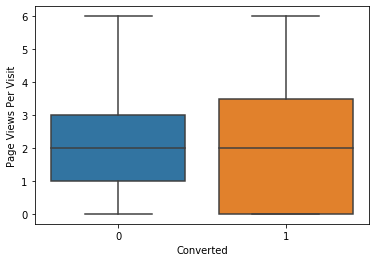

In [102]:
sns.boxplot('Converted','Page Views Per Visit',data=leads_data_corrected)

In [103]:
#Nothing can be infered from this plot

                              Count  Converted  %Converted
Last Activity                                             
Approached upfront                5          5  100.000000
Converted to Lead               428         54   12.616822
Email Bounced                   312         16    5.128205
Email Link Clicked              267         73   27.340824
Email Marked Spam                 2          2  100.000000
Email Opened                   3432       1250   36.421911
Email Received                    2          2  100.000000
Form Submitted on Website       116         28   24.137931
Had a Phone Conversation         25         20   80.000000
Olark Chat Conversation         972         84    8.641975
Page Visited on Website         640        151   23.593750
Resubscribed to emails            1          1  100.000000
SMS Sent                       2716       1705   62.776141
Unreachable                      90         29   32.222222
Unsubscribed                     59         14   23.7288

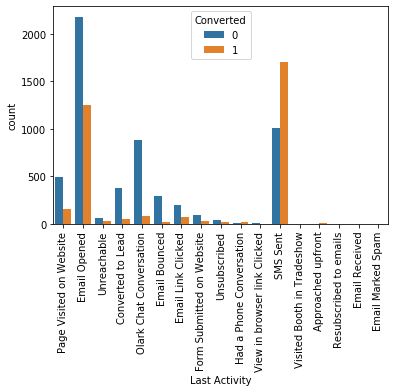

In [104]:
#counts of categories in Last Activity
conversion_percent('Last Activity',rotation=90)

In [105]:
#categories having count less than 10

In [106]:
leads_data_corrected.groupby('Last Activity').count()[leads_data_corrected.groupby('Last Activity').
                                                    count()['Converted']<10].index

Index(['Approached upfront', 'Email Marked Spam', 'Email Received',
       'Resubscribed to emails', 'View in browser link Clicked',
       'Visited Booth in Tradeshow'],
      dtype='object', name='Last Activity')

In [107]:
# Reducing the number categories by grouping all the small sources(<10) to Others Activities
leads_data_corrected['Last Activity']=leads_data_corrected['Last Activity'].replace(['Approached upfront', 'Email Marked Spam', 'Email Received',
       'Resubscribed to emails', 'View in browser link Clicked',
       'Visited Booth in Tradeshow'],'Other Activities')

                           Count  Converted  %Converted
Last Activity                                          
Converted to Lead            428         54   12.616822
Email Bounced                312         16    5.128205
Email Link Clicked           267         73   27.340824
Email Opened                3432       1250   36.421911
Form Submitted on Website    116         28   24.137931
Had a Phone Conversation      25         20   80.000000
Olark Chat Conversation      972         84    8.641975
Other Activities              17         11   64.705882
Page Visited on Website      640        151   23.593750
SMS Sent                    2716       1705   62.776141
Unreachable                   90         29   32.222222
Unsubscribed                  59         14   23.728814


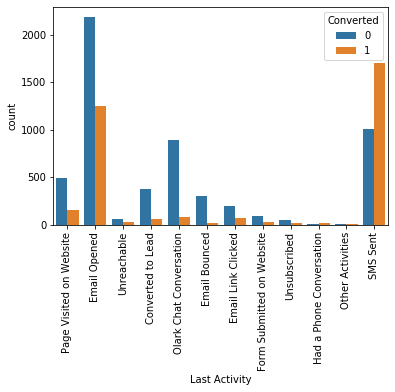

In [108]:
#conversion plot
conversion_percent('Last Activity',rotation=90)

In [109]:
#Had phone conversion has more conversion rate
#Email Opened and SMS sent are most activities but not great conversion rate

In [110]:
#country
leads_data_corrected['Country'].value_counts()

India                   8787
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
South Africa               4
Kuwait                     4
Germany                    4
Canada                     4
Nigeria                    4
Sweden                     3
Netherlands                2
Uganda                     2
Bangladesh                 2
China                      2
Philippines                2
Ghana                      2
Belgium                    2
Asia/Pacific Region        2
Italy                      2
Russia                     1
Tanzania                   1
Malaysia                   1
Liberia                    1
Vietnam                    1
Sri Lanka                  1
Switzerland   

In [111]:
#No inference made from country

                                   Count  Converted  %Converted
Specialization                                                 
Banking, Investment And Insurance    335        164   48.955224
Business Administration              399        175   43.859649
E-Business                            57         21   36.842105
E-COMMERCE                           111         39   35.135135
Finance Management                   959        422   44.004171
Healthcare Management                156         76   48.717949
Hospitality Management               111         45   40.540541
Human Resource Management            837        380   45.400239
IT Projects Management               366        140   38.251366
International Business               176         62   35.227273
Marketing Management                 823        397   48.238153
Media and Advertising                202         84   41.584158
Operations Management                499        234   46.893788
Otherspec                           3282

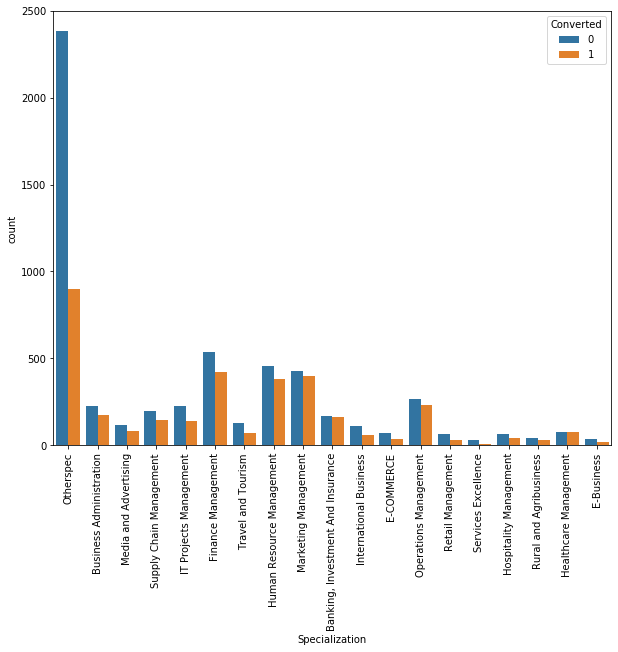

In [112]:
#Conversion plot of Specialization
conversion_percent('Specialization',figsize=(10,8),rotation=90)

In [113]:
# lead conversion is less than 50 for all the Specializations

In [114]:
#What is your current occupation
leads_data_corrected['What is your current occupation'].value_counts()

Unemployed              8159
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

                                 Count  Converted  %Converted
What is your current occupation                              
Businessman                          8          5   62.500000
Housewife                            9          9  100.000000
Other                               15          9   60.000000
Student                            206         74   35.922330
Unemployed                        8159       2716   33.288393
Working Professional               677        622   91.875923


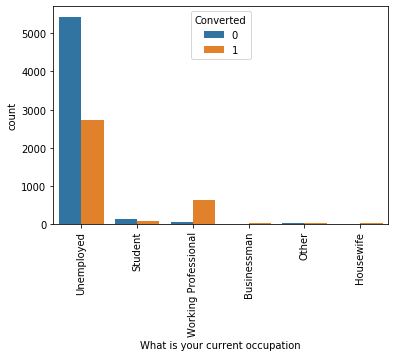

In [115]:
#conversion plot
conversion_percent('What is your current occupation',rotation=90)

In [116]:
#conversion rate is higher for housewife Business, Working Professional
# Most leads are unemployed but conversion is less

                                               Count  Converted  %Converted
What matters most to you in choosing a course                              
Better Career Prospects                         9072       3434   37.852734
Flexibility & Convenience                          1          1  100.000000
Other                                              1          0    0.000000


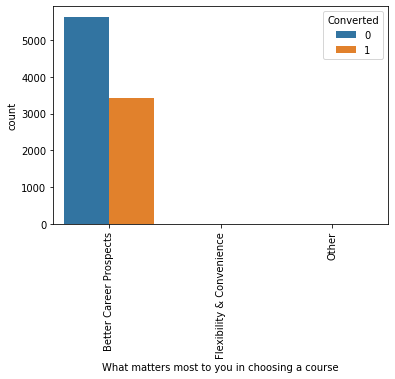

In [117]:
# conversion plot What matters most to you in choosing a course
conversion_percent('What matters most to you in choosing a course',rotation=90)

In [118]:
#Not much information as variance is low

        Count  Converted  %Converted
Search                              
No       9060       3430   37.858720
Yes        14          5   35.714286


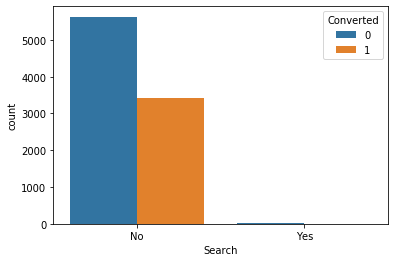

In [119]:
#Search
conversion_percent('Search')

In [120]:
#not much information because of low variance

          Count  Converted  %Converted
Magazine                              
No         9074       3435   37.855411


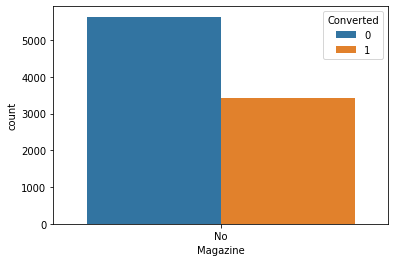

In [121]:
#Magazine
conversion_percent('Magazine')

In [122]:
#not much information No variance

                   Count  Converted  %Converted
Newspaper Article                              
No                  9072       3434   37.852734
Yes                    2          1   50.000000


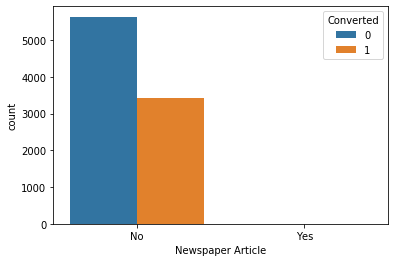

In [123]:
#conversion plot
conversion_percent('Newspaper Article')

In [124]:
#not much information low variance

                    Count  Converted  %Converted
X Education Forums                              
No                   9073       3435   37.859583
Yes                     1          0    0.000000


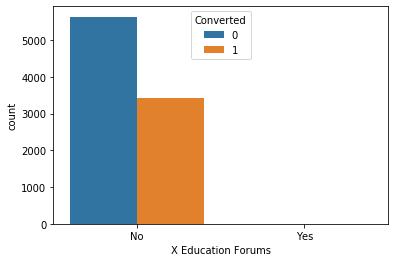

In [125]:
#X Education Forums
conversion_percent('X Education Forums')

In [126]:
#not much information, low variance

           Count  Converted  %Converted
Newspaper                              
No          9073       3435   37.859583
Yes            1          0    0.000000


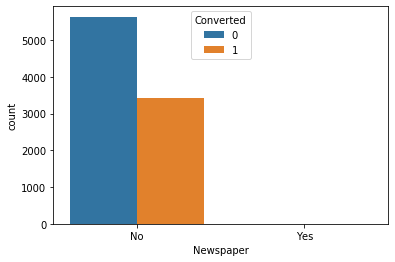

In [127]:
#Newspaper
conversion_percent('Newspaper')

In [128]:
#not much information

                       Count  Converted  %Converted
Digital Advertisement                              
No                      9070       3434    37.86108
Yes                        4          1    25.00000


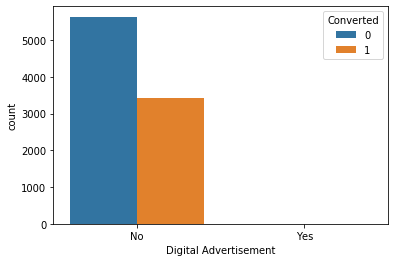

In [129]:
#Digital Advertisment
conversion_percent('Digital Advertisement')

In [130]:
#not much information

                         Count  Converted  %Converted
Through Recommendations                              
No                        9067       3430   37.829492
Yes                          7          5   71.428571


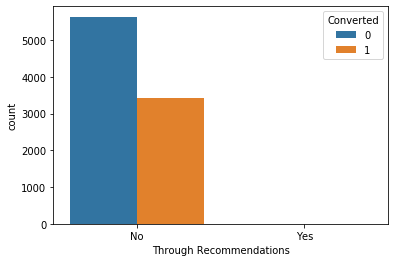

In [131]:
#Through Recommendatins
conversion_percent('Through Recommendations')

In [132]:
#Low varaince

                                        Count  Converted  %Converted
Receive More Updates About Our Courses                              
No                                       9074       3435   37.855411


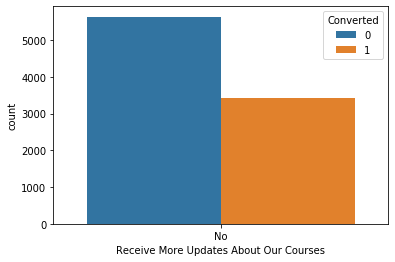

In [133]:
#Receive More Updates About Our Courses
conversion_percent('Receive More Updates About Our Courses')

In [134]:
#No variance in data

In [135]:
#Tags conversion plot
leads_data_corrected['Tags'].value_counts()

in touch with EINS                                   3339
Will revert after reading the email                  2016
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
Lost to Others

In [136]:
#categories having count less than 10
leads_data_corrected.groupby('Tags').count()[leads_data_corrected.groupby('Tags').
                                                    count()['Converted']<10].index

Index(['In confusion whether part time or DLP', 'Interested in Next batch',
       'Lateral student', 'Lost to Others', 'Recognition issue (DEC approval)',
       'Shall take in the next coming month', 'Still Thinking',
       'University not recognized',
       'Want to take admission but has financial problems'],
      dtype='object', name='Tags')

In [137]:
# Reducing the number categories by grouping all the small sources(<10) to Others Tags
leads_data_corrected['Tags']=leads_data_corrected['Tags'].replace(['In confusion whether part time or DLP', 'Interested in Next batch',
       'Lateral student', 'Lost to Others', 'Recognition issue (DEC approval)',
       'Shall take in the next coming month', 'Still Thinking',
       'University not recognized',
       'Want to take admission but has financial problems'],'Other Tags')

                                     Count  Converted  %Converted
Tags                                                             
Already a student                      465          3    0.645161
Busy                                   185        105   56.756757
Closed by Horizzon                     301        299   99.335548
Diploma holder (Not Eligible)           63          1    1.587302
Graduation in progress                 111          7    6.306306
Interested  in full time MBA           116          3    2.586207
Interested in other courses            509         13    2.554028
Lost to EINS                           172        168   97.674419
Not doing further education            145          1    0.689655
Other Tags                              37         13   35.135135
Ringing                               1187         34    2.864364
Will revert after reading the email   2016       1957   97.073413
in touch with EINS                    3339        823   24.648098
invalid nu

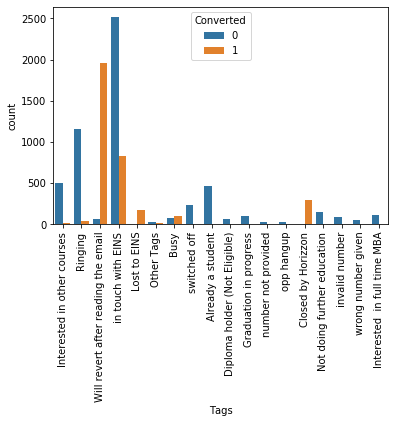

In [138]:
#conversion plot of tags
conversion_percent('Tags',rotation=90)

In [139]:
# Closed by horizzon,Lost to EINS,Will revert after reading the email have more conversion rates

                   Count  Converted  %Converted
Lead Quality                                   
High in Relevance    592        558   94.256757
Low in Relevance     556        455   81.834532
Might be            1519       1150   75.707702
Not Sure            5806       1260   21.701688
Worst                601         12    1.996672


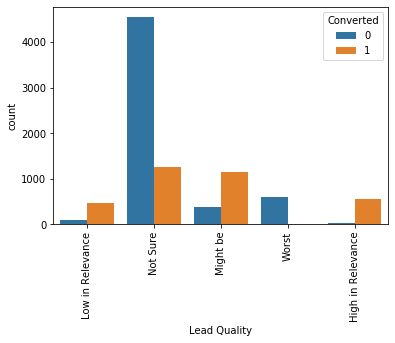

In [140]:
#conversion plot for lead quality
conversion_percent('Lead Quality',rotation=90)

In [141]:
#Conversion rate is high for High in Relevance

                                   Count  Converted  %Converted
Update me on Supply Chain Content                              
No                                  9074       3435   37.855411


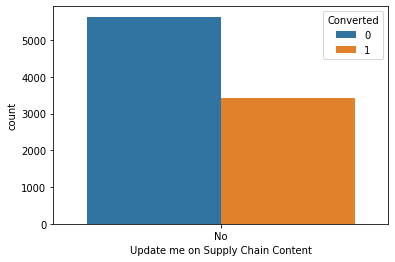

In [142]:
#Update me on Supply Chain Content
conversion_percent('Update me on Supply Chain Content')

In [143]:
#no variance in data

                           Count  Converted  %Converted
Get updates on DM Content                              
No                          9074       3435   37.855411


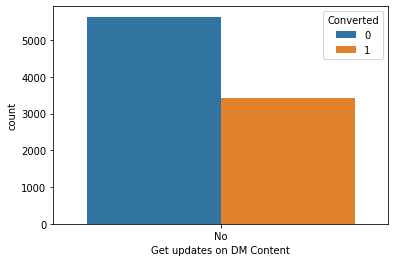

In [144]:
# Get updates on DM Content
conversion_percent('Get updates on DM Content')

In [145]:
#No variancae in data

                             Count  Converted  %Converted
City                                                     
Mumbai                        6752       2456   36.374408
Other Cities                   680        272   40.000000
Other Cities of Maharashtra    446        196   43.946188
Other Metro Cities             377        154   40.848806
Thane & Outskirts              745        332   44.563758
Tier II Cities                  74         25   33.783784


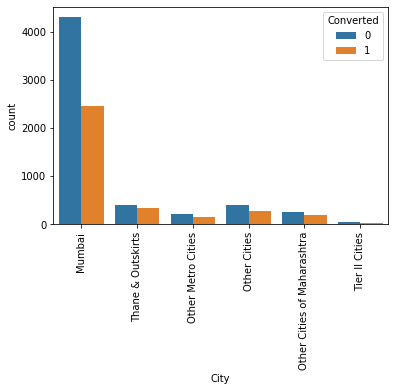

In [146]:
# City
conversion_percent('City',rotation=90)

In [147]:
#Tier II cities have low conversion rate than metro

                                          Count  Converted  %Converted
I agree to pay the amount through cheque                              
No                                         9074       3435   37.855411


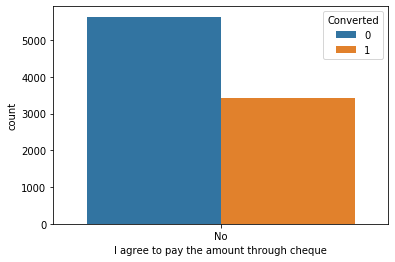

In [148]:
# I agree to pay the amount through cheque
conversion_percent('I agree to pay the amount through cheque')

In [149]:
#No variance in data

                                        Count  Converted  %Converted
A free copy of Mastering The Interview                              
No                                       6186       2405   38.878112
Yes                                      2888       1030   35.664820


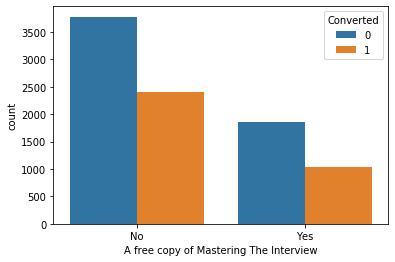

In [150]:
# A free copy of Mastering The Interview
conversion_percent('A free copy of Mastering The Interview')

In [151]:
#Not much information as both No and Yes have nearly same conversion rates

                              Count  Converted  %Converted
Last Notable Activity                                     
Approached upfront                1          1  100.000000
Email Bounced                    60          9   15.000000
Email Link Clicked              173         45   26.011561
Email Marked Spam                 2          2  100.000000
Email Opened                   2823       1042   36.911087
Email Received                    1          1  100.000000
Form Submitted on Website         1          0    0.000000
Had a Phone Conversation         14         13   92.857143
Modified                       3267        680   20.814203
Olark Chat Conversation         183         25   13.661202
Page Visited on Website         318         93   29.245283
Resubscribed to emails            1          1  100.000000
SMS Sent                       2152       1489   69.191450
Unreachable                      32         22   68.750000
Unsubscribed                     45         12   26.6666

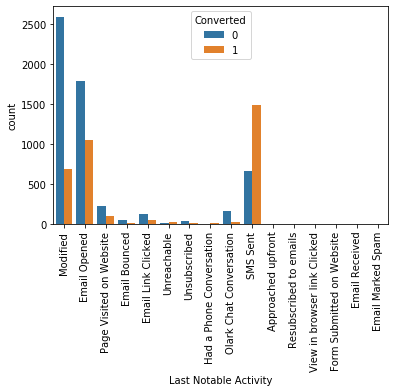

In [152]:
# Last Notable Activity
conversion_percent('Last Notable Activity',rotation=90)

In [153]:
#categories having count less than 10
leads_data_corrected.groupby('Last Notable Activity').count()[leads_data_corrected.groupby('Last Notable Activity').
                                                    count()['Converted']<10].index

Index(['Approached upfront', 'Email Marked Spam', 'Email Received',
       'Form Submitted on Website', 'Resubscribed to emails',
       'View in browser link Clicked'],
      dtype='object', name='Last Notable Activity')

In [154]:
# Reducing the number categories by grouping all the small sources(<10) to Others Activities
leads_data_corrected['Last Notable Activity']=leads_data_corrected['Last Notable Activity'].replace(['Approached upfront', 'Email Marked Spam', 'Email Received',
       'Form Submitted on Website', 'Resubscribed to emails',
       'View in browser link Clicked'],'Other Activities')

                          Count  Converted  %Converted
Last Notable Activity                                 
Email Bounced                60          9   15.000000
Email Link Clicked          173         45   26.011561
Email Opened               2823       1042   36.911087
Had a Phone Conversation     14         13   92.857143
Modified                   3267        680   20.814203
Olark Chat Conversation     183         25   13.661202
Other Activities              7          5   71.428571
Page Visited on Website     318         93   29.245283
SMS Sent                   2152       1489   69.191450
Unreachable                  32         22   68.750000
Unsubscribed                 45         12   26.666667


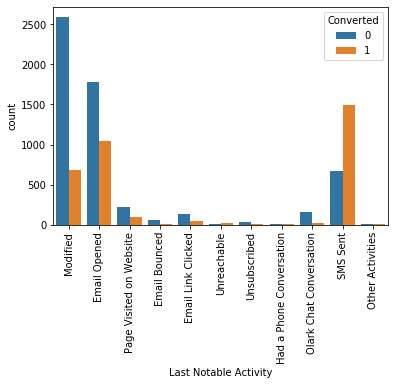

In [155]:
# Last Notable Activity
conversion_percent('Last Notable Activity',rotation=90)

In [156]:
#Conversion rate is high for had a phone conversation

In [157]:
#previewing data after univariant analysis
leads_data_corrected.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,Interested in other courses,Low in Relevance,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,No,Modified


In [158]:
#Dropping variables which doesn't have much information(No or less variance) or not useful for modeling

In [159]:
leads_data_corrected.drop(['Lead Number','What matters most to you in choosing a course','Search',
'Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
'Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content',
'I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'],1,inplace=True)

In [160]:
leads_data_corrected.shape

(9074, 16)

### Transformating the data

##### Label Encoding

In [161]:
leads_data_corrected.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'Lead Quality', 'City', 'Last Notable Activity'],
      dtype='object')

In [162]:
# Cleaned dataframe
lead_cleaned_data=leads_data_corrected.copy()

In [163]:
leads_data_corrected['Lead Origin'].value_counts()

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

In [164]:
#label encoding
leads_data_corrected[[ 'API','Landing Page Submission','Lead Add Form']]=pd.get_dummies(leads_data_corrected['Lead Origin'],drop_first=False).drop('Lead Import',axis=1)

In [165]:
#droping original column
leads_data_corrected.drop('Lead Origin',axis=1,inplace=True)

In [166]:
leads_data_corrected['Lead Source'].value_counts().index

Index(['Google', 'Direct Traffic', 'Olark Chat', 'Organic Search', 'Reference',
       'Welingak Website', 'Referral Sites', 'Facebook', 'Others'],
      dtype='object')

In [167]:
#label encoding Lead source
leads_data_corrected[['Direct Traffic', 'Facebook','Google','Olark Chat', 'Organic Search', 'Reference','Referral Sites',
       'Welingak Website']]=pd.get_dummies(leads_data_corrected['Lead Source']).drop('Others',axis=1)

In [168]:
#droping Lead source(origincal) column
leads_data_corrected.drop('Lead Source',axis=1,inplace=True)

In [169]:
leads_data_corrected['Do Not Email'].value_counts()

No     8358
Yes     716
Name: Do Not Email, dtype: int64

In [170]:
#Binary encoding
leads_data_corrected['Do Not Email']=leads_data_corrected['Do Not Email'].map({'Yes':1,'No':0})

In [171]:
#binary encoding
leads_data_corrected['Do Not Call']=leads_data_corrected['Do Not Call'].map({'Yes':1,'No':0})

In [172]:
leads_data_corrected.columns

Index(['Prospect ID', 'Do Not Email', 'Do Not Call', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'Lead Quality', 'City', 'Last Notable Activity', 'API',
       'Landing Page Submission', 'Lead Add Form', 'Direct Traffic',
       'Facebook', 'Google', 'Olark Chat', 'Organic Search', 'Reference',
       'Referral Sites', 'Welingak Website'],
      dtype='object')

In [173]:
#label encoding 
temp=pd.get_dummies(leads_data_corrected[['Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'Lead Quality', 'City', 'Last Notable Activity']]).drop(['Last Activity_Other Activities','Specialization_Otherspec','What is your current occupation_Other',
    'Tags_Other Tags','Lead Quality_Not Sure','City_Tier II Cities','Last Notable Activity_Other Activities'],axis=1)

In [174]:
#concatinating encoding column with leads data corrected dataframe
leads_data_corrected=pd.concat([leads_data_corrected,temp],axis=1)

In [175]:
#dropping original columns
leads_data_corrected.drop(['Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'Lead Quality', 'City', 'Last Notable Activity'],axis=1,inplace=True)

In [176]:
#previewing the data after encoding
leads_data_corrected.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,API,Landing Page Submission,Lead Add Form,...,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


### Data Preparation

In [177]:
#preview the shape of data
leads_data_corrected.shape

(9074, 88)

In [178]:
#X dataframe having all the columns except Prospect Id and dependent variable Converted
X=leads_data_corrected.drop(['Prospect ID','Converted'],axis=1)

In [179]:
X.shape

(9074, 86)

In [180]:
#y having dependent variable
y=leads_data_corrected['Converted']

In [181]:
y.shape

(9074,)

In [182]:
#importing train test split
from sklearn.model_selection import train_test_split

In [183]:
#split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=42)

### Feature Scaling

In [184]:
#importing standard scaler
from sklearn.preprocessing import StandardScaler

In [185]:
#instantiation of Standardscalar
scaler=StandardScaler()

In [186]:
#previewing the X train
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,API,Landing Page Submission,Lead Add Form,Direct Traffic,Facebook,...,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
1943,0,0,2.0,1419,2.0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
456,0,0,2.0,56,2.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6547,0,0,5.0,391,5.0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
8836,0,0,4.0,1645,4.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6529,0,0,5.0,660,5.0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [187]:
#fit and transformX_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]ing X train data
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(
    X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [188]:
#transforming X test data
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.transform(
    X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [189]:
#preview the data after scaling
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,API,Landing Page Submission,Lead Add Form,Direct Traffic,Facebook,...,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
1943,0,0,-0.432839,1.704380,-0.147676,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
456,0,0,-0.432839,-0.789845,-0.147676,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6547,0,0,0.644762,-0.176811,1.544362,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
8836,0,0,0.285562,2.117949,0.980349,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6529,0,0,0.644762,0.315446,1.544362,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [190]:
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,API,Landing Page Submission,Lead Add Form,Direct Traffic,Facebook,...,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
465,0,0,1.003962,-0.250009,2.108375,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5424,0,0,0.285562,0.361195,0.980349,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3503,0,0,-1.151239,-0.892323,-1.275702,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4465,0,0,-1.151239,-0.892323,-1.275702,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5394,0,0,0.285562,-0.592210,-0.525565,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Model Building for Feature selection

In [191]:
#importing statsmodel and VIF
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [192]:
#adding constant and building the model
#previewing the summary
X_train_sm=sm.add_constant(X_train)
model1=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6265
Model Family:                Binomial   Df Model:                           85
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 18 Nov 2019   Deviance:                          nan
Time:                        18:55:50   Pearson chi2:                 2.67e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                -1.689e+15   3.56e+07  -4.74e+07      0.000   -1.69e+15   -1.69e+15
Do Not Email                                         -9.477e+13   4.43e+06  -2.14e+07      0.000   -9.48e+13   -9.48e+13
Do Not Call                                           3.946e+15   6.75e+07   5.85e+07      0.000    3.95e+15    3.95e+15
TotalVisits                                           1.046e+14   1.43e+06   7.32e+07      0.000    1.05e+14    1.05e+14
Total Time Spent on Website                           2.335e+14   1.03e+06   2.26e+08      0.000    2.33e+14    2.33e+14
Page Views Per Visit                                 -7.533e+13   1.56e+06  -4.82e+07      0.000   -7.53e+13   -7.53e+13
API                                                  -1.505e+14   1.44e+07  -1.05e+07      0.000   -1.51e+14   -1.51e+14
Landing Page Submission                              -3.774e+14   1.45e+07  -2.61e+07      0.000   -3.77e+14   -3.77e+14
Lead Add Form                                        -9.302e+14   2.57e+07  -3.63e+07      0.000    -9.3e+14    -9.3e+14
Direct Traffic                                       -8.161e+13    1.8e+07  -4.54e+06      0.000   -8.16e+13   -8.16e+13
Facebook                                              -2.31e+14   1.78e+07   -1.3e+07      0.000   -2.31e+14   -2.31e+14
Google                                               -8.179e+13    1.8e+07  -4.55e+06      0.000   -8.18e+13   -8.18e+13
Olark Chat                                           -6.086e+14   1.81e+07  -3.36e+07      0.000   -6.09e+14   -6.09e+14
Organic Search                                       -7.843e+13   1.81e+07  -4.33e+06      0.000   -7.84e+13   -7.84e+13
Reference                                             7.376e+14   3.14e+07   2.35e+07      0.000    7.38e+14    7.38e+14
Referral Sites                                       -1.588e+14   1.94e+07  -8.19e+06      0.000   -1.59e+14   -1.59e+14
Welingak Website                                      1.384e+15   3.19e+07   4.33e+07      0.000    1.38e+15    1.38e+15
Last Activity_Converted to Lead                      -3.905e+14   2.64e+07  -1.48e+07      0.000    -3.9e+14    -3.9e+14
Last Activity_Email Bounced                          -5.483e+14   2.68e+07  -2.04e+07      0.000   -5.48e+14   -5.48e+14
Last Activity_Email Link Clicked                     -2.173e+14   2.72e+07  -7.99e+06      0.000   -2.17e+14   -2.17e+14
Last Activity_Email Opened                           -2.478e+14   2.62e+07  -9.46e+06      0.000   -2.48e+14   -2.48e+14
Last Activity_Form Submitted on Website              -3.306e+14   2.68e+07  -1.23e+07      0.000   -3.31e+14   -3.31e+14
Last Activity_Had a Phone Conversation               -4.16

In [193]:
# function which calculates VIF for each col in the given dataframe and return its corresponding values in a dataframe
def VIF(X_train):
    col=X_train.columns
    vif=pd.DataFrame()
    vif['Features']=col
    vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(len(col))]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF',ascending=False)
    print(vif)

In [194]:
VIF(X_train_sm)

                                             Features     VIF
10                                           Facebook     inf
6                                                 API     inf
7                             Landing Page Submission     inf
8                                       Lead Add Form     inf
81                     Last Notable Activity_Modified  491.42
79                 Last Notable Activity_Email Opened  466.57
84                     Last Notable Activity_SMS Sent  392.19
20                         Last Activity_Email Opened  228.50
25                             Last Activity_SMS Sent  202.95
11                                             Google   98.68
23              Last Activity_Olark Chat Conversation   92.64
9                                      Direct Traffic   92.18
83      Last Notable Activity_Page Visited on Website   71.19
12                                         Olark Chat   71.07
14                                          Reference   64.16
24      

## Feature Selection Using RFE

In [195]:
#importing Logistic regrsession and RFE modules
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [196]:
#instantiation of logistic regression
lrmodel=LogisticRegression()

In [197]:
#fitting RFE
rfe=RFE(lrmodel,30)
rfe=rfe.fit(X_train,y_train)

In [198]:
#creating a dataframe having rank of all features and support values
features=pd.DataFrame(zip(X_train.columns,rfe.support_,rfe.ranking_),columns=['Features','Support','Ranking'])

In [199]:
#previewing the dataframe
features

,Features,Support,Ranking
0,Do Not Email,True,1
1,Do Not Call,False,57
2,TotalVisits,False,18
3,Total Time Spent on Website,True,1
4,Page Views Per Visit,False,17
5,API,False,11
6,Landing Page Submission,False,3
7,Lead Add Form,True,1
8,Direct Traffic,True,1
9,Facebook,False,37


In [200]:
# assign support true values to col variable
col=X_train.columns[rfe.support_]

In [201]:
#columns choosed by RFE
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Add Form',
       'Direct Traffic', 'Google', 'Organic Search', 'Referral Sites',
       'Welingak Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Unemployed', 'Tags_Already a student',
       'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Quality_High in Relevance',
       'Lead Quality_Worst', 'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [202]:
# columns not choosed by RFE
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'API',
       'Landing Page Submission', 'Facebook', 'Olark Chat', 'Reference',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',


In [203]:
#building the model with RFE selected features

In [204]:
X_train_sm=sm.add_constant(X_train[col])
model2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
model2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6320
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1173.6
Date:                Mon, 18 Nov 2019   Deviance:                       2347.3
Time:                        18:55:56   Pearson chi2:                 1.01e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.3655      0.340      1.074      0.283      -0.302       1.033
Do Not Email                                     -1.0212      0.255     -4.006      0.000      -1.521      -0.522
Total Time Spent on Website                       1.1264      0.064     17.727      0.000       1.002       1.251
Lead Add Form                                     0.1840      0.415      0.443      0.657      -0.629       0.997
Direct Traffic                                   -1.5866      0.179     -8.842      0.000      -1.938      -1.235
Google                                           -1.2674      0.164     -7.708      0.000      -1.590      -0.945
Organic Search                                   -1.3129      0.206     -6.367      0.000      -1.717      -0.909
Referral Sites                                   -1.4347      0.493     -2.913      0.004      -2.400      -0.469
Welingak Website                                  4.7974      1.094      4.384      0.000       2.653       6.942
Last Activity_SMS Sent                            1.3391      0.228      5.874      0.000       0.892       1.786
What is your current occupation_Unemployed       -0.7219      0.314     -2.298      0.022      -1.338      -0.106
Tags_Already a student                           -3.6268      1.052     -3.447      0.001      -5.689      -1.564
Tags_Busy                                         0.7691      0.241      3.190      0.001       0.297       1.242
Tags_Closed by Horizzon                           6.2641      0.754      8.313      0.000       4.787       7.741
Tags_Diploma holder (Not Eligible)              -24.0052   2.99e+04     -0.001      0.999   -5.86e+04    5.86e+04
Tags_Interested  in full time MBA                -1.8547      0.781     -2.376      0.018      -3.385      -0.325
Tags_Interested in other courses                 -1.7613      0.361     -4.873      0.000      -2.470      -1.053
Tags_Lost to EINS                                 6.4338      0.771      8.347      0.000       4.923       7.945
Tags_Not doing further education                 -2.0271      1.044     -1.942      0.052      -4.073       0.019
Tags_Ringing                                     -3.5391      0.249    -14.205      0.000      -4.027      -3.051
Tags_Will revert after reading the email          4.3805      0.204     21.436      0.000       3.980       4.781
Tags_invalid number                             -24.4586    2.4e+04     -0.001      0.999   -4.71e+04    4.71e+04
Tags_number not provided                        -25.4406   4.36e+04     -0.001      1.000   -8.55e+04    8.54e+04
Tags_switched off                                -3.9176      0.615     -6.373      0.000      -5.122      -2.713
Tags_

In [205]:
VIF(X_train_sm)

                                         Features    VIF
0                                           const  22.87
30                 Last Notable Activity_SMS Sent   5.03
9                          Last Activity_SMS Sent   4.35
5                                          Google   2.25
4                                  Direct Traffic   2.22
20       Tags_Will revert after reading the email   1.93
3                                   Lead Add Form   1.88
26                             Lead Quality_Worst   1.76
6                                  Organic Search   1.70
11                         Tags_Already a student   1.68
28                 Last Notable Activity_Modified   1.57
2                     Total Time Spent on Website   1.47
13                        Tags_Closed by Horizzon   1.40
8                                Welingak Website   1.35
25                 Lead Quality_High in Relevance   1.34
10     What is your current occupation_Unemployed   1.27
19                             

In [206]:
# dropping Tags_number not provided

In [207]:
col=col.drop('Tags_number not provided')

In [208]:
X_train_sm=sm.add_constant(X_train[col])
model3=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
model3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6321
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1180.4
Date:                Mon, 18 Nov 2019   Deviance:                       2360.7
Time:                        18:55:58   Pearson chi2:                 9.98e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.3667      0.341      1.076      0.282      -0.301       1.035
Do Not Email                                     -1.0455      0.253     -4.134      0.000      -1.541      -0.550
Total Time Spent on Website                       1.1172      0.063     17.696      0.000       0.993       1.241
Lead Add Form                                     0.1886      0.415      0.455      0.649      -0.624       1.001
Direct Traffic                                   -1.6012      0.179     -8.953      0.000      -1.952      -1.251
Google                                           -1.2518      0.164     -7.641      0.000      -1.573      -0.931
Organic Search                                   -1.3009      0.206     -6.330      0.000      -1.704      -0.898
Referral Sites                                   -1.4244      0.492     -2.895      0.004      -2.389      -0.460
Welingak Website                                  4.8013      1.094      4.388      0.000       2.657       6.946
Last Activity_SMS Sent                            1.3485      0.228      5.918      0.000       0.902       1.795
What is your current occupation_Unemployed       -0.7329      0.315     -2.329      0.020      -1.350      -0.116
Tags_Already a student                           -3.5569      1.047     -3.399      0.001      -5.608      -1.506
Tags_Busy                                         0.7928      0.240      3.301      0.001       0.322       1.264
Tags_Closed by Horizzon                           6.2717      0.753      8.324      0.000       4.795       7.748
Tags_Diploma holder (Not Eligible)              -23.9720   2.98e+04     -0.001      0.999   -5.85e+04    5.84e+04
Tags_Interested  in full time MBA                -1.8322      0.780     -2.348      0.019      -3.362      -0.303
Tags_Interested in other courses                 -1.7403      0.360     -4.828      0.000      -2.447      -1.034
Tags_Lost to EINS                                 6.4889      0.778      8.344      0.000       4.965       8.013
Tags_Not doing further education                 -1.9657      1.040     -1.890      0.059      -4.004       0.073
Tags_Ringing                                     -3.5003      0.248    -14.109      0.000      -3.987      -3.014
Tags_Will revert after reading the email          4.3876      0.204     21.499      0.000       3.988       4.788
Tags_invalid number                             -24.4156    2.4e+04     -0.001      0.999   -4.71e+04     4.7e+04
Tags_switched off                                -3.8774      0.614     -6.315      0.000      -5.081      -2.674
Tags_wrong number given                         -24.2963   3.31e+04     -0.001      0.999    -6.5e+04    6.49e+04
Lead 

In [209]:
VIF(X_train_sm)

                                         Features    VIF
0                                           const  22.86
29                 Last Notable Activity_SMS Sent   5.03
9                          Last Activity_SMS Sent   4.35
5                                          Google   2.25
4                                  Direct Traffic   2.21
20       Tags_Will revert after reading the email   1.93
3                                   Lead Add Form   1.88
25                             Lead Quality_Worst   1.76
6                                  Organic Search   1.70
11                         Tags_Already a student   1.68
27                 Last Notable Activity_Modified   1.57
2                     Total Time Spent on Website   1.47
13                        Tags_Closed by Horizzon   1.40
8                                Welingak Website   1.35
24                 Lead Quality_High in Relevance   1.34
10     What is your current occupation_Unemployed   1.27
19                             

In [210]:
#dropping Tags_Diploma holder (Not Eligible) because of high p value
col=col.drop('Tags_Diploma holder (Not Eligible)')

In [211]:
X_train_sm=sm.add_constant(X_train[col])
model4=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
model4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6322
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1186.8
Date:                Mon, 18 Nov 2019   Deviance:                       2373.6
Time:                        18:55:58   Pearson chi2:                 9.93e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.3376      0.341      0.989      0.323      -0.331       1.007
Do Not Email                                     -1.0585      0.252     -4.198      0.000      -1.553      -0.564
Total Time Spent on Website                       1.1024      0.063     17.610      0.000       0.980       1.225
Lead Add Form                                     0.1982      0.414      0.479      0.632      -0.613       1.010
Direct Traffic                                   -1.5944      0.178     -8.935      0.000      -1.944      -1.245
Google                                           -1.2490      0.163     -7.647      0.000      -1.569      -0.929
Organic Search                                   -1.2773      0.205     -6.235      0.000      -1.679      -0.876
Referral Sites                                   -1.3990      0.491     -2.850      0.004      -2.361      -0.437
Welingak Website                                  4.8034      1.094      4.391      0.000       2.659       6.948
Last Activity_SMS Sent                            1.3632      0.227      5.993      0.000       0.917       1.809
What is your current occupation_Unemployed       -0.7337      0.315     -2.326      0.020      -1.352      -0.116
Tags_Already a student                           -3.4742      1.041     -3.337      0.001      -5.515      -1.434
Tags_Busy                                         0.8091      0.240      3.369      0.001       0.338       1.280
Tags_Closed by Horizzon                           6.3301      0.754      8.400      0.000       4.853       7.807
Tags_Interested  in full time MBA                -1.7917      0.780     -2.297      0.022      -3.320      -0.263
Tags_Interested in other courses                 -1.7078      0.360     -4.741      0.000      -2.414      -1.002
Tags_Lost to EINS                                 6.5505      0.783      8.368      0.000       5.016       8.085
Tags_Not doing further education                 -1.9070      1.037     -1.839      0.066      -3.939       0.125
Tags_Ringing                                     -3.4830      0.248    -14.060      0.000      -3.969      -2.997
Tags_Will revert after reading the email          4.4149      0.204     21.634      0.000       4.015       4.815
Tags_invalid number                             -23.3987   1.45e+04     -0.002      0.999   -2.85e+04    2.85e+04
Tags_switched off                                -3.8612      0.614     -6.292      0.000      -5.064      -2.658
Tags_wrong number given                         -23.2691   2.01e+04     -0.001      0.999   -3.94e+04    3.93e+04
Lead Quality_High in Relevance                    0.5825      0.405      1.437      0.151      -0.212       1.377
Lead 

In [212]:
#dropping Tags_invalid number because of high p value
col=col.drop('Tags_invalid number')

In [213]:
X_train_sm=sm.add_constant(X_train[col])
model5=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
model5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6323
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1199.6
Date:                Mon, 18 Nov 2019   Deviance:                       2399.3
Time:                        18:55:59   Pearson chi2:                 9.80e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.3462      0.342      1.013      0.311      -0.324       1.016
Do Not Email                                     -1.0461      0.250     -4.185      0.000      -1.536      -0.556
Total Time Spent on Website                       1.1133      0.062     17.855      0.000       0.991       1.235
Lead Add Form                                     0.2065      0.414      0.499      0.618      -0.606       1.019
Direct Traffic                                   -1.6300      0.177     -9.206      0.000      -1.977      -1.283
Google                                           -1.2566      0.163     -7.714      0.000      -1.576      -0.937
Organic Search                                   -1.3339      0.203     -6.583      0.000      -1.731      -0.937
Referral Sites                                   -1.4032      0.493     -2.848      0.004      -2.369      -0.438
Welingak Website                                  4.8177      1.094      4.404      0.000       2.674       6.962
Last Activity_SMS Sent                            1.3663      0.228      6.002      0.000       0.920       1.812
What is your current occupation_Unemployed       -0.7487      0.316     -2.368      0.018      -1.368      -0.129
Tags_Already a student                           -3.3941      1.037     -3.274      0.001      -5.426      -1.362
Tags_Busy                                         0.8619      0.239      3.605      0.000       0.393       1.331
Tags_Closed by Horizzon                           6.3554      0.754      8.432      0.000       4.878       7.833
Tags_Interested  in full time MBA                -1.7613      0.781     -2.255      0.024      -3.292      -0.231
Tags_Interested in other courses                 -1.6794      0.360     -4.667      0.000      -2.385      -0.974
Tags_Lost to EINS                                 6.6589      0.796      8.366      0.000       5.099       8.219
Tags_Not doing further education                 -1.8280      1.034     -1.768      0.077      -3.855       0.199
Tags_Ringing                                     -3.4155      0.246    -13.867      0.000      -3.898      -2.933
Tags_Will revert after reading the email          4.4428      0.204     21.789      0.000       4.043       4.842
Tags_switched off                                -3.7918      0.613     -6.182      0.000      -4.994      -2.590
Tags_wrong number given                         -22.1960   1.21e+04     -0.002      0.999   -2.38e+04    2.38e+04
Lead Quality_High in Relevance                    0.5872      0.406      1.445      0.148      -0.209       1.383
Lead Quality_Worst                               -1.9173      0.702     -2.730      0.006      -3.294      -0.541
Last 

In [214]:
VIF(X_train_sm)

                                         Features    VIF
0                                           const  22.82
27                 Last Notable Activity_SMS Sent   5.03
9                          Last Activity_SMS Sent   4.35
5                                          Google   2.25
4                                  Direct Traffic   2.20
19       Tags_Will revert after reading the email   1.91
3                                   Lead Add Form   1.88
23                             Lead Quality_Worst   1.71
6                                  Organic Search   1.69
11                         Tags_Already a student   1.64
25                 Last Notable Activity_Modified   1.57
2                     Total Time Spent on Website   1.47
13                        Tags_Closed by Horizzon   1.39
8                                Welingak Website   1.35
22                 Lead Quality_High in Relevance   1.34
10     What is your current occupation_Unemployed   1.27
18                             

In [215]:
#dropping Tags_wrong number given because of high p vaue
col=col.drop('Tags_wrong number given')

In [216]:
X_train_sm=sm.add_constant(X_train[col])
model5=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
model5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6324
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1206.6
Date:                Mon, 18 Nov 2019   Deviance:                       2413.2
Time:                        18:55:59   Pearson chi2:                 9.77e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.3523      0.342      1.029      0.303      -0.319       1.023
Do Not Email                                     -1.0551      0.248     -4.247      0.000      -1.542      -0.568
Total Time Spent on Website                       1.1124      0.062     17.914      0.000       0.991       1.234
Lead Add Form                                     0.2005      0.414      0.484      0.628      -0.612       1.013
Direct Traffic                                   -1.6633      0.177     -9.409      0.000      -2.010      -1.317
Google                                           -1.2696      0.163     -7.800      0.000      -1.589      -0.951
Organic Search                                   -1.3542      0.202     -6.710      0.000      -1.750      -0.959
Referral Sites                                   -1.4107      0.493     -2.864      0.004      -2.376      -0.445
Welingak Website                                  4.8277      1.094      4.413      0.000       2.684       6.972
Last Activity_SMS Sent                            1.3712      0.228      6.023      0.000       0.925       1.817
What is your current occupation_Unemployed       -0.7577      0.317     -2.392      0.017      -1.379      -0.137
Tags_Already a student                           -3.3595      1.036     -3.242      0.001      -5.390      -1.329
Tags_Busy                                         0.8924      0.239      3.739      0.000       0.425       1.360
Tags_Closed by Horizzon                           6.3767      0.753      8.463      0.000       4.900       7.854
Tags_Interested  in full time MBA                -1.7414      0.781     -2.230      0.026      -3.272      -0.211
Tags_Interested in other courses                 -1.6623      0.360     -4.624      0.000      -2.367      -0.958
Tags_Lost to EINS                                 6.7015      0.800      8.379      0.000       5.134       8.269
Tags_Not doing further education                 -1.7926      1.033     -1.735      0.083      -3.818       0.233
Tags_Ringing                                     -3.3796      0.246    -13.763      0.000      -3.861      -2.898
Tags_Will revert after reading the email          4.4626      0.204     21.903      0.000       4.063       4.862
Tags_switched off                                -3.7554      0.613     -6.123      0.000      -4.957      -2.553
Lead Quality_High in Relevance                    0.5697      0.402      1.419      0.156      -0.217       1.357
Lead Quality_Worst                               -1.9844      0.694     -2.858      0.004      -3.345      -0.623
Last Notable Activity_Email Link Clicked         -1.1246      0.437     -2.576      0.010      -1.980      -0.269
Last 

In [217]:
VIF(X_train_sm)

                                         Features    VIF
0                                           const  22.82
26                 Last Notable Activity_SMS Sent   5.02
9                          Last Activity_SMS Sent   4.35
5                                          Google   2.25
4                                  Direct Traffic   2.20
19       Tags_Will revert after reading the email   1.91
3                                   Lead Add Form   1.88
22                             Lead Quality_Worst   1.70
6                                  Organic Search   1.69
11                         Tags_Already a student   1.63
24                 Last Notable Activity_Modified   1.57
2                     Total Time Spent on Website   1.47
13                        Tags_Closed by Horizzon   1.39
8                                Welingak Website   1.35
21                 Lead Quality_High in Relevance   1.34
10     What is your current occupation_Unemployed   1.27
18                             

In [218]:
#droping Lead Add Form because of high p value
col=col.drop('Lead Add Form')

In [219]:
X_train_sm=sm.add_constant(X_train[col])
model6=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
model6.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6325
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1206.7
Date:                Mon, 18 Nov 2019   Deviance:                       2413.4
Time:                        18:56:00   Pearson chi2:                 9.77e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.3758      0.339      1.110      0.267      -0.288       1.040
Do Not Email                                     -1.0481      0.248     -4.233      0.000      -1.533      -0.563
Total Time Spent on Website                       1.1128      0.062     17.905      0.000       0.991       1.235
Direct Traffic                                   -1.6809      0.173     -9.712      0.000      -2.020      -1.342
Google                                           -1.2856      0.159     -8.063      0.000      -1.598      -0.973
Organic Search                                   -1.3706      0.199     -6.885      0.000      -1.761      -0.980
Referral Sites                                   -1.4262      0.493     -2.896      0.004      -2.392      -0.461
Welingak Website                                  5.0153      1.023      4.904      0.000       3.011       7.020
Last Activity_SMS Sent                            1.3804      0.227      6.090      0.000       0.936       1.825
What is your current occupation_Unemployed       -0.7693      0.316     -2.436      0.015      -1.388      -0.150
Tags_Already a student                           -3.3617      1.036     -3.243      0.001      -5.393      -1.330
Tags_Busy                                         0.8941      0.239      3.746      0.000       0.426       1.362
Tags_Closed by Horizzon                           6.4292      0.746      8.619      0.000       4.967       7.891
Tags_Interested  in full time MBA                -1.7427      0.781     -2.230      0.026      -3.274      -0.211
Tags_Interested in other courses                 -1.6609      0.360     -4.617      0.000      -2.366      -0.956
Tags_Lost to EINS                                 6.7088      0.800      8.391      0.000       5.142       8.276
Tags_Not doing further education                 -1.7765      1.032     -1.721      0.085      -3.800       0.247
Tags_Ringing                                     -3.3720      0.245    -13.758      0.000      -3.852      -2.892
Tags_Will revert after reading the email          4.4787      0.201     22.263      0.000       4.084       4.873
Tags_switched off                                -3.7566      0.614     -6.123      0.000      -4.959      -2.554
Lead Quality_High in Relevance                    0.5900      0.399      1.479      0.139      -0.192       1.372
Lead Quality_Worst                               -1.9829      0.693     -2.861      0.004      -3.341      -0.625
Last Notable Activity_Email Link Clicked         -1.1289      0.436     -2.589      0.010      -1.983      -0.274
Last Notable Activity_Modified                   -1.4303      0.156     -9.183      0.000      -1.736      -1.125
Last 

In [220]:
VIF(X_train_sm)

                                         Features    VIF
0                                           const  21.65
25                 Last Notable Activity_SMS Sent   5.01
8                          Last Activity_SMS Sent   4.31
4                                          Google   2.03
3                                  Direct Traffic   2.00
18       Tags_Will revert after reading the email   1.84
21                             Lead Quality_Worst   1.70
10                         Tags_Already a student   1.63
5                                  Organic Search   1.58
23                 Last Notable Activity_Modified   1.56
2                     Total Time Spent on Website   1.45
20                 Lead Quality_High in Relevance   1.32
12                        Tags_Closed by Horizzon   1.31
9      What is your current occupation_Unemployed   1.25
17                                   Tags_Ringing   1.24
16               Tags_Not doing further education   1.18
14               Tags_Intereste

In [221]:
#droping Lead Quality_High in Relevance because of high p value
col=col.drop('Lead Quality_High in Relevance')

In [222]:
X_train_sm=sm.add_constant(X_train[col])
model7=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
model7.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6326
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1207.8
Date:                Mon, 18 Nov 2019   Deviance:                       2415.7
Time:                        18:56:00   Pearson chi2:                 9.83e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.3563      0.341      1.045      0.296      -0.312       1.024
Do Not Email                                     -1.0421      0.248     -4.207      0.000      -1.528      -0.557
Total Time Spent on Website                       1.1128      0.062     17.901      0.000       0.991       1.235
Direct Traffic                                   -1.6899      0.173     -9.769      0.000      -2.029      -1.351
Google                                           -1.2918      0.159     -8.112      0.000      -1.604      -0.980
Organic Search                                   -1.3802      0.199     -6.933      0.000      -1.770      -0.990
Referral Sites                                   -1.4153      0.488     -2.898      0.004      -2.373      -0.458
Welingak Website                                  5.0028      1.023      4.891      0.000       2.998       7.007
Last Activity_SMS Sent                            1.3954      0.227      6.139      0.000       0.950       1.841
What is your current occupation_Unemployed       -0.7343      0.318     -2.313      0.021      -1.357      -0.112
Tags_Already a student                           -3.3582      1.037     -3.239      0.001      -5.390      -1.326
Tags_Busy                                         0.8973      0.239      3.754      0.000       0.429       1.366
Tags_Closed by Horizzon                           6.7029      0.728      9.211      0.000       5.277       8.129
Tags_Interested  in full time MBA                -1.7342      0.781     -2.222      0.026      -3.264      -0.204
Tags_Interested in other courses                 -1.6498      0.360     -4.577      0.000      -2.356      -0.943
Tags_Lost to EINS                                 6.7449      0.799      8.442      0.000       5.179       8.311
Tags_Not doing further education                 -1.7758      1.032     -1.721      0.085      -3.799       0.247
Tags_Ringing                                     -3.3710      0.245    -13.757      0.000      -3.851      -2.891
Tags_Will revert after reading the email          4.5642      0.195     23.448      0.000       4.183       4.946
Tags_switched off                                -3.7587      0.614     -6.126      0.000      -4.961      -2.556
Lead Quality_Worst                               -1.9938      0.696     -2.863      0.004      -3.359      -0.629
Last Notable Activity_Email Link Clicked         -1.1554      0.438     -2.636      0.008      -2.014      -0.296
Last Notable Activity_Modified                   -1.4507      0.156     -9.319      0.000      -1.756      -1.146
Last Notable Activity_Olark Chat Conversation    -1.1954      0.373     -3.207      0.001      -1.926      -0.465
Last 

In [223]:
VIF(X_train_sm)

                                         Features    VIF
0                                           const  21.47
24                 Last Notable Activity_SMS Sent   5.01
8                          Last Activity_SMS Sent   4.31
4                                          Google   2.02
3                                  Direct Traffic   1.99
20                             Lead Quality_Worst   1.70
18       Tags_Will revert after reading the email   1.65
10                         Tags_Already a student   1.63
5                                  Organic Search   1.57
22                 Last Notable Activity_Modified   1.56
2                     Total Time Spent on Website   1.45
17                                   Tags_Ringing   1.24
9      What is your current occupation_Unemployed   1.21
16               Tags_Not doing further education   1.18
14               Tags_Interested in other courses   1.17
12                        Tags_Closed by Horizzon   1.10
1                              

In [224]:
#droping Tags_Not doing further education because of high p value
col=col.drop('Tags_Not doing further education')

In [225]:
X_train_sm=sm.add_constant(X_train[col])
model8=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
model8.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6327
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1210.4
Date:                Mon, 18 Nov 2019   Deviance:                       2420.8
Time:                        18:56:01   Pearson chi2:                 9.98e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.3235      0.338      0.958      0.338      -0.338       0.985
Do Not Email                                     -1.0762      0.246     -4.379      0.000      -1.558      -0.595
Total Time Spent on Website                       1.1143      0.062     17.960      0.000       0.993       1.236
Direct Traffic                                   -1.7051      0.173     -9.877      0.000      -2.043      -1.367
Google                                           -1.2959      0.159     -8.137      0.000      -1.608      -0.984
Organic Search                                   -1.3813      0.199     -6.944      0.000      -1.771      -0.991
Referral Sites                                   -1.4160      0.489     -2.895      0.004      -2.375      -0.457
Welingak Website                                  5.0162      1.023      4.904      0.000       3.011       7.021
Last Activity_SMS Sent                            1.4078      0.227      6.198      0.000       0.963       1.853
What is your current occupation_Unemployed       -0.7130      0.315     -2.265      0.024      -1.330      -0.096
Tags_Already a student                           -3.2901      1.035     -3.180      0.001      -5.318      -1.262
Tags_Busy                                         0.9108      0.239      3.807      0.000       0.442       1.380
Tags_Closed by Horizzon                           6.7289      0.728      9.246      0.000       5.303       8.155
Tags_Interested  in full time MBA                -1.7007      0.780     -2.179      0.029      -3.230      -0.171
Tags_Interested in other courses                 -1.6316      0.361     -4.520      0.000      -2.339      -0.924
Tags_Lost to EINS                                 6.8605      0.813      8.438      0.000       5.267       8.454
Tags_Ringing                                     -3.3641      0.245    -13.723      0.000      -3.845      -2.884
Tags_Will revert after reading the email          4.5855      0.195     23.549      0.000       4.204       4.967
Tags_switched off                                -3.7487      0.614     -6.106      0.000      -4.952      -2.546
Lead Quality_Worst                               -2.2544      0.671     -3.361      0.001      -3.569      -0.940
Last Notable Activity_Email Link Clicked         -1.1455      0.439     -2.609      0.009      -2.006      -0.285
Last Notable Activity_Modified                   -1.4523      0.155     -9.341      0.000      -1.757      -1.148
Last Notable Activity_Olark Chat Conversation    -1.1838      0.373     -3.172      0.002      -1.915      -0.452
Last Notable Activity_SMS Sent                    0.7367      0.264      2.795      0.005       0.220       1.253
=====

In [226]:
VIF(X_train_sm)

                                         Features    VIF
0                                           const  21.45
23                 Last Notable Activity_SMS Sent   5.01
8                          Last Activity_SMS Sent   4.31
4                                          Google   2.02
3                                  Direct Traffic   1.98
17       Tags_Will revert after reading the email   1.64
5                                  Organic Search   1.57
21                 Last Notable Activity_Modified   1.56
10                         Tags_Already a student   1.54
19                             Lead Quality_Worst   1.53
2                     Total Time Spent on Website   1.45
16                                   Tags_Ringing   1.23
9      What is your current occupation_Unemployed   1.21
14               Tags_Interested in other courses   1.15
12                        Tags_Closed by Horizzon   1.10
1                                    Do Not Email   1.07
18                             

In [227]:
#Droping Last Notable Activity_SMS Sent because of high VIF

In [228]:
col=col.drop('Last Notable Activity_SMS Sent')

In [229]:
X_train_sm=sm.add_constant(X_train[col])
model9=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
model9.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6328
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1214.3
Date:                Mon, 18 Nov 2019   Deviance:                       2428.7
Time:                        18:56:01   Pearson chi2:                 1.01e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.4006      0.337      1.188      0.235      -0.260       1.061
Do Not Email                                     -1.0560      0.246     -4.299      0.000      -1.537      -0.575
Total Time Spent on Website                       1.1097      0.062     17.970      0.000       0.989       1.231
Direct Traffic                                   -1.7135      0.172     -9.977      0.000      -2.050      -1.377
Google                                           -1.3184      0.158     -8.328      0.000      -1.629      -1.008
Organic Search                                   -1.3802      0.197     -6.991      0.000      -1.767      -0.993
Referral Sites                                   -1.4254      0.485     -2.938      0.003      -2.376      -0.475
Welingak Website                                  4.9708      1.024      4.853      0.000       2.963       6.978
Last Activity_SMS Sent                            1.9502      0.118     16.571      0.000       1.720       2.181
What is your current occupation_Unemployed       -0.7171      0.316     -2.270      0.023      -1.336      -0.098
Tags_Already a student                           -3.3307      1.035     -3.217      0.001      -5.360      -1.301
Tags_Busy                                         0.9300      0.237      3.932      0.000       0.466       1.394
Tags_Closed by Horizzon                           6.8430      0.729      9.389      0.000       5.415       8.271
Tags_Interested  in full time MBA                -1.7512      0.788     -2.223      0.026      -3.295      -0.207
Tags_Interested in other courses                 -1.6051      0.361     -4.443      0.000      -2.313      -0.897
Tags_Lost to EINS                                 7.0167      0.816      8.595      0.000       5.417       8.617
Tags_Ringing                                     -3.2726      0.241    -13.604      0.000      -3.744      -2.801
Tags_Will revert after reading the email          4.6329      0.197     23.498      0.000       4.246       5.019
Tags_switched off                                -3.6637      0.612     -5.991      0.000      -4.862      -2.465
Lead Quality_Worst                               -2.2515      0.674     -3.340      0.001      -3.573      -0.930
Last Notable Activity_Email Link Clicked         -1.2281      0.440     -2.788      0.005      -2.091      -0.365
Last Notable Activity_Modified                   -1.7171      0.128    -13.372      0.000      -1.969      -1.465
Last Notable Activity_Olark Chat Conversation    -1.2557      0.372     -3.373      0.001      -1.985      -0.526
=================================================================================================================
"""

In [230]:
VIF(X_train_sm)

                                         Features    VIF
0                                           const  21.09
4                                          Google   2.01
3                                  Direct Traffic   1.98
17       Tags_Will revert after reading the email   1.64
5                                  Organic Search   1.57
10                         Tags_Already a student   1.54
19                             Lead Quality_Worst   1.53
2                     Total Time Spent on Website   1.45
21                 Last Notable Activity_Modified   1.24
16                                   Tags_Ringing   1.23
9      What is your current occupation_Unemployed   1.21
8                          Last Activity_SMS Sent   1.19
14               Tags_Interested in other courses   1.15
12                        Tags_Closed by Horizzon   1.10
22  Last Notable Activity_Olark Chat Conversation   1.07
1                                    Do Not Email   1.07
7                              

In [231]:
#Final model

In [232]:
X_train_sm=sm.add_constant(X_train[col])
final_model=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6328
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1214.3
Date:                Mon, 18 Nov 2019   Deviance:                       2428.7
Time:                        18:56:02   Pearson chi2:                 1.01e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.4006      0.337      1.188      0.235      -0.260       1.061
Do Not Email                                     -1.0560      0.246     -4.299      0.000      -1.537      -0.575
Total Time Spent on Website                       1.1097      0.062     17.970      0.000       0.989       1.231
Direct Traffic                                   -1.7135      0.172     -9.977      0.000      -2.050      -1.377
Google                                           -1.3184      0.158     -8.328      0.000      -1.629      -1.008
Organic Search                                   -1.3802      0.197     -6.991      0.000      -1.767      -0.993
Referral Sites                                   -1.4254      0.485     -2.938      0.003      -2.376      -0.475
Welingak Website                                  4.9708      1.024      4.853      0.000       2.963       6.978
Last Activity_SMS Sent                            1.9502      0.118     16.571      0.000       1.720       2.181
What is your current occupation_Unemployed       -0.7171      0.316     -2.270      0.023      -1.336      -0.098
Tags_Already a student                           -3.3307      1.035     -3.217      0.001      -5.360      -1.301
Tags_Busy                                         0.9300      0.237      3.932      0.000       0.466       1.394
Tags_Closed by Horizzon                           6.8430      0.729      9.389      0.000       5.415       8.271
Tags_Interested  in full time MBA                -1.7512      0.788     -2.223      0.026      -3.295      -0.207
Tags_Interested in other courses                 -1.6051      0.361     -4.443      0.000      -2.313      -0.897
Tags_Lost to EINS                                 7.0167      0.816      8.595      0.000       5.417       8.617
Tags_Ringing                                     -3.2726      0.241    -13.604      0.000      -3.744      -2.801
Tags_Will revert after reading the email          4.6329      0.197     23.498      0.000       4.246       5.019
Tags_switched off                                -3.6637      0.612     -5.991      0.000      -4.862      -2.465
Lead Quality_Worst                               -2.2515      0.674     -3.340      0.001      -3.573      -0.930
Last Notable Activity_Email Link Clicked         -1.2281      0.440     -2.788      0.005      -2.091      -0.365
Last Notable Activity_Modified                   -1.7171      0.128    -13.372      0.000      -1.969      -1.465
Last Notable Activity_Olark Chat Conversation    -1.2557      0.372     -3.373      0.001      -1.985      -0.526
=================================================================================================================
"""

In [233]:
VIF(X_train_sm)

                                         Features    VIF
0                                           const  21.09
4                                          Google   2.01
3                                  Direct Traffic   1.98
17       Tags_Will revert after reading the email   1.64
5                                  Organic Search   1.57
10                         Tags_Already a student   1.54
19                             Lead Quality_Worst   1.53
2                     Total Time Spent on Website   1.45
21                 Last Notable Activity_Modified   1.24
16                                   Tags_Ringing   1.23
9      What is your current occupation_Unemployed   1.21
8                          Last Activity_SMS Sent   1.19
14               Tags_Interested in other courses   1.15
12                        Tags_Closed by Horizzon   1.10
22  Last Notable Activity_Olark Chat Conversation   1.07
1                                    Do Not Email   1.07
7                              

In [234]:
#previewing the shape of X_train_sm
X_train_sm.shape

(6351, 23)

In [235]:
#prediction of X_train set
y_predict=final_model.predict(X_train_sm)

In [236]:
y_predict[:10]

1943    0.031947
456     0.012926
6547    0.027959
8836    0.064851
6529    0.997410
7798    0.369109
2349    0.005274
5057    0.994032
3954    0.001019
4523    0.999083
dtype: float64

In [237]:
leads_data_corrected.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,API,Landing Page Submission,Lead Add Form,...,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [238]:
#created a dataframe with actual converted and converted probability values
predictions=pd.DataFrame({'Converted':y_train.values,'Converted_prob':y_predict})
predictions['ID']=y_train.index

In [239]:
#previewing the dataframe
predictions.head()

,Converted,Converted_prob,ID
1943,0,0.031947,1943
456,0,0.012926,456
6547,0,0.027959,6547
8836,0,0.064851,8836
6529,1,0.997410,6529


In [240]:
#choosing 0.5 as cutoff
predictions['Predicted']=predictions['Converted_prob'].apply(lambda x: 1 if x>0.5 else 0)

In [241]:
#previewing the predictions dataframe
predictions.head()

,Converted,Converted_prob,ID,Predicted
1943,0,0.031947,1943,0
456,0,0.012926,456,0
6547,0,0.027959,6547,0
8836,0,0.064851,8836,0
6529,1,0.997410,6529,1


In [242]:
#importing metrics
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix

In [243]:
#confusion matrix of predictions dataframe
confusion_matrix(predictions['Converted'],predictions['Predicted'])

array([[3821,  156],
       [ 298, 2076]], dtype=int64)

In [244]:
#accuracy score
accuracy_score(predictions['Converted'],predictions['Predicted'])

0.9285151944575657

In [245]:
#importing ROC curve and ROC area score
from sklearn.metrics import roc_curve,roc_auc_score

In [246]:
#area under roc curve
area=roc_auc_score(predictions['Converted'],predictions['Predicted'])

In [247]:
#ROC Curve

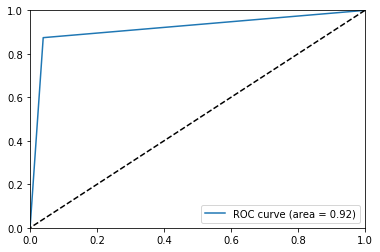

In [248]:
fpr,tpr,thres=roc_curve(predictions['Converted'],predictions['Predicted'])
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' %area)
plt.plot([1,0],[1,0],'k--')
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend()
plt.show()

In [249]:
#precitions for thresholds from 0 to 1 at a step of 0.1
for i in np.arange(0,1,0.1):
    predictions[round(i,1)]=predictions['Converted_prob'].apply(lambda x: 1 if x>i else 0)

In [250]:
#previewing predictions using different thresholds
predictions.head()

,Converted,Converted_prob,ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1943,0,0.031947,1943,0,1,0,0,0,0,0,0,0,0,0
456,0,0.012926,456,0,1,0,0,0,0,0,0,0,0,0
6547,0,0.027959,6547,0,1,0,0,0,0,0,0,0,0,0
8836,0,0.064851,8836,0,1,0,0,0,0,0,0,0,0,0
6529,1,0.997410,6529,1,1,1,1,1,1,1,1,1,1,1


In [251]:
#creating metrics df having accuracy, sensitivity,specificity with different thersholds
metrices_df=pd.DataFrame(columns=['Conversion_prob','accuracy','sensitivity','specificity'])
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    cm1=confusion_matrix(predictions['Converted'],predictions[i])#Confusion matrix
    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives
    total=sum(sum(cm1))#total count
    accuracy=(cm1[0,0]+cm1[1,1])/total
    sensitivity=cm1[1,1]/(cm1[1,0]+cm1[1,1])
    specificity=cm1[0,0]/(cm1[0,1]+cm1[0,0])
    metrices_df.loc[i]=[i,accuracy,sensitivity,specificity]

In [252]:
#previewing the metrics df
metrices_df

,Conversion_prob,accuracy,sensitivity,specificity
0.1,0.1,0.853094,0.972199,0.781996
0.2,0.2,0.894820,0.952822,0.860196
0.3,0.3,0.919068,0.910699,0.924063
0.4,0.4,0.925051,0.893850,0.943676
0.5,0.5,0.928515,0.874473,0.960774
0.6,0.6,0.926941,0.854254,0.970329
0.7,0.7,0.915289,0.806655,0.980136
0.8,0.8,0.908676,0.779275,0.985919
0.9,0.9,0.890883,0.724937,0.989942


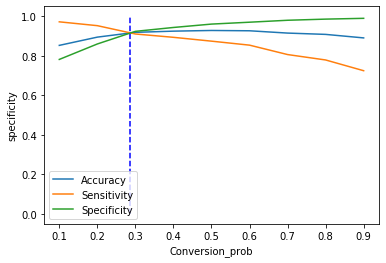

In [253]:
#line plot to choose the cutoff of sensitivity and specificity
sns.lineplot(x='Conversion_prob',y='accuracy',data=metrices_df,legend='full',label='Accuracy')
sns.lineplot(x='Conversion_prob',y='sensitivity',data=metrices_df,legend='full',label='Sensitivity')
sns.lineplot(x='Conversion_prob',y='specificity',data=metrices_df,legend='full',label='Specificity')
plt.vlines(0.285,ymax=1,ymin=0,colors='blue',linestyles='--')
plt.legend()
plt.show()

#### From the curve above, 0.285 is the optimum point to take it as a cutoff probability.

In [254]:
#At 0.285 cuttoff accuracy,sensitivity,specificity are high

In [255]:
#choosing 0.285 as cutoff
predictions['final_predicted']=predictions['Converted_prob'].apply(lambda x: 1 if x>0.285 else 0)

In [256]:
#previewing the predictions
predictions.head()

,Converted,Converted_prob,ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
1943,0,0.031947,1943,0,1,0,0,0,0,0,0,0,0,0,0
456,0,0.012926,456,0,1,0,0,0,0,0,0,0,0,0,0
6547,0,0.027959,6547,0,1,0,0,0,0,0,0,0,0,0,0
8836,0,0.064851,8836,0,1,0,0,0,0,0,0,0,0,0,0
6529,1,0.997410,6529,1,1,1,1,1,1,1,1,1,1,1,1


In [257]:
#accurancy score
accuracy_score(predictions['Converted'],predictions['final_predicted'])

0.9187529522909778

In [258]:
#confusion mtx
confusion_mtx = confusion_matrix(predictions['Converted'],predictions['final_predicted'])
confusion_mtx

array([[3669,  308],
       [ 208, 2166]], dtype=int64)

In [259]:
TP = confusion_mtx[1,1] # true positive 
TN = confusion_mtx[0,0] # true negatives
FP = confusion_mtx[0,1] # false positives
FN = confusion_mtx[1,0] # false negatives

In [260]:
#sensitivity
TP / float(TP+FN)

0.9123841617523167

In [261]:
#specificity
TN / float(TN+FP)

0.9225546894644204

In [262]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.07744531053557958


In [263]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8755052546483427


In [264]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9463502708279597


### Precision and Recall

In [265]:
#importing modules to calculate recall,precision score and to plot precision and recall curve
from sklearn.metrics import recall_score,precision_score,precision_recall_curve

In [266]:
#precision and Recall
print("precision score %0.3f" %precision_score(predictions['Converted'],predictions['final_predicted']))
print("recall score %0.3f " %recall_score(predictions['Converted'],predictions['final_predicted']))

precision score 0.876
recall score 0.912 


In [267]:
#precision and recall values for different thresholds
precision,recall,thresholds=precision_recall_curve(predictions['Converted'],predictions['Converted_prob'])

In [268]:
precision.shape

(4627,)

In [269]:
thresholds.shape

(4626,)

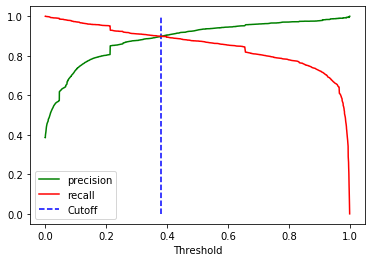

In [270]:
#plotting precision and recall curve
plt.plot(thresholds, precision[:-1], "g-",label="precision")
plt.plot(thresholds, recall[:-1], "r-",label="recall")
plt.xlabel("Threshold")
plt.vlines(0.38,ymin=0,ymax=1,linestyles='--',label='Cutoff',colors='blue')
plt.legend()
plt.show()

In [271]:
#At 0.38 cuttoff precision, recall are high

### Making predictions on test data

In [272]:
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,API,Landing Page Submission,Lead Add Form,Direct Traffic,Facebook,...,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
465,0,0,1.003962,-0.250009,2.108375,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5424,0,0,0.285562,0.361195,0.980349,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3503,0,0,-1.151239,-0.892323,-1.275702,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4465,0,0,-1.151239,-0.892323,-1.275702,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5394,0,0,0.285562,-0.592210,-0.525565,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [273]:
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Direct Traffic',
       'Google', 'Organic Search', 'Referral Sites', 'Welingak Website',
       'Last Activity_SMS Sent', 'What is your current occupation_Unemployed',
       'Tags_Already a student', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Worst', 'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [274]:
X_test=X_test[col]

In [275]:
X_test.head()

,Do Not Email,Total Time Spent on Website,Direct Traffic,Google,Organic Search,Referral Sites,Welingak Website,Last Activity_SMS Sent,What is your current occupation_Unemployed,Tags_Already a student,...,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Worst,Last Notable Activity_Email Link Clicked,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
465,0,-0.250009,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5424,0,0.361195,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
3503,0,-0.892323,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
4465,0,-0.892323,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
5394,0,-0.592210,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [276]:
X_test.shape

(2723, 22)

In [277]:
X_test_sm=sm.add_constant(X_test[col])

In [278]:
X_test_sm.shape

(2723, 23)

In [279]:
y_test_pred=final_model.predict(X_test_sm)

In [280]:
y_test_pred[:10]

465     0.025845
5424    0.005145
3503    0.001027
4465    0.008367
5394    0.063517
7831    0.086753
2314    0.991161
7042    0.280661
5428    0.213029
4349    0.944556
dtype: float64

In [281]:
test_predictions=pd.DataFrame({'Converted':y_test.values,'Converted_prob':y_test_pred})
test_predictions['ID']=y_test.index

In [282]:
test_predictions.head()

,Converted,Converted_prob,ID
465,0,0.025845,465
5424,0,0.005145,5424
3503,0,0.001027,3503
4465,0,0.008367,4465
5394,0,0.063517,5394


##### Going with specificity and sensitivity view
##### So using the model built with 0.285 threshold

In [283]:
test_predictions["final_predicted"]=test_predictions['Converted_prob'].apply(lambda x: 1 if x>0.285 else 0)

In [284]:
test_predictions.head()

,Converted,Converted_prob,ID,final_predicted
465,0,0.025845,465,0
5424,0,0.005145,5424,0
3503,0,0.001027,3503,0
4465,0,0.008367,4465,0
5394,0,0.063517,5394,0


In [285]:
accuracy_score(test_predictions['Converted'],test_predictions['final_predicted'])

0.9192067572530297

In [286]:
confusion_matrix_test=confusion_matrix(test_predictions['Converted'],test_predictions['final_predicted'])

In [287]:
confusion_matrix_test

array([[1526,  136],
       [  84,  977]], dtype=int64)

In [288]:
TP = confusion_matrix_test[1,1] # true positive 
TN = confusion_matrix_test[0,0] # true negatives
FP = confusion_matrix_test[0,1] # false positives
FN = confusion_matrix_test[1,0]# false negatives

In [289]:
#sensitivity
TP / float(TP+FN)

0.9208294062205467

In [290]:
#specificity
TN / float(TN+FP)

0.9181708784596871

In [291]:
precision_score(test_predictions['Converted'],test_predictions['final_predicted'])

0.8778077268643306

In [292]:
recall_score(test_predictions['Converted'],test_predictions['final_predicted'])

0.9208294062205467

#### Going with recall and precision view
#### So using the model built with 0.38 threshold

In [293]:
test_predictions["final_predicted_precision_recall"]=test_predictions['Converted_prob'].apply(lambda x: 1 if x>0.38 else 0)

In [294]:
test_predictions.head()

,Converted,Converted_prob,ID,final_predicted,final_predicted_precision_recall
465,0,0.025845,465,0,0
5424,0,0.005145,5424,0,0
3503,0,0.001027,3503,0,0
4465,0,0.008367,4465,0,0
5394,0,0.063517,5394,0,0


In [295]:
accuracy_score(test_predictions['Converted'],test_predictions['final_predicted_precision_recall'])

0.9239809034153507

In [296]:
confusion_matrix_test=confusion_matrix(test_predictions['Converted'],test_predictions['final_predicted_precision_recall'])

In [297]:
TP = confusion_matrix_test[1,1] # true positive 
TN = confusion_matrix_test[0,0] # true negatives
FP = confusion_matrix_test[0,1] # false positives
FN = confusion_matrix_test[1,0]# false negatives

In [298]:
#sensitivity
TP / float(TP+FN)

0.9066918001885014

In [299]:
#specificity
TN / float(TN+FP)

0.9350180505415162

In [300]:
#precision score
precision_score(test_predictions['Converted'],test_predictions['final_predicted_precision_recall'])

0.8990654205607477

In [301]:
#recall score
recall_score(test_predictions['Converted'],test_predictions['final_predicted_precision_recall'])

0.9066918001885014

In [302]:
# Leads scores

In [303]:
#lead scores of training data
predictions['Lead Score']=round(predictions['Converted_prob']*100,2)

In [304]:
predictions.head(10)

,Converted,Converted_prob,ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead Score
1943,0,0.031947,1943,0,1,0,0,0,0,0,0,0,0,0,0,3.19
456,0,0.012926,456,0,1,0,0,0,0,0,0,0,0,0,0,1.29
6547,0,0.027959,6547,0,1,0,0,0,0,0,0,0,0,0,0,2.80
8836,0,0.064851,8836,0,1,0,0,0,0,0,0,0,0,0,0,6.49
6529,1,0.997410,6529,1,1,1,1,1,1,1,1,1,1,1,1,99.74
7798,0,0.369109,7798,0,1,1,1,1,0,0,0,0,0,0,1,36.91
2349,0,0.005274,2349,0,1,0,0,0,0,0,0,0,0,0,0,0.53
5057,1,0.994032,5057,1,1,1,1,1,1,1,1,1,1,1,1,99.40
3954,0,0.001019,3954,0,1,0,0,0,0,0,0,0,0,0,0,0.10
4523,1,0.999083,4523,1,1,1,1,1,1,1,1,1,1,1,1,99.91


In [305]:
#lead scores for testing data
test_predictions['Lead Score']=round(test_predictions['Converted_prob']*100,2)

In [306]:
test_predictions.head(10)

,Converted,Converted_prob,ID,final_predicted,final_predicted_precision_recall,Lead Score
465,0,0.025845,465,0,0,2.58
5424,0,0.005145,5424,0,0,0.51
3503,0,0.001027,3503,0,0,0.10
4465,0,0.008367,4465,0,0,0.84
5394,0,0.063517,5394,0,0,6.35
7831,0,0.086753,7831,0,0,8.68
2314,1,0.991161,2314,1,1,99.12
7042,0,0.280661,7042,0,0,28.07
5428,0,0.213029,5428,0,0,21.30
4349,1,0.944556,4349,1,1,94.46


In [307]:
#concating leadscores of train and test data to get lead scores of complete dataframe
temp=pd.concat([predictions,test_predictions])['Lead Score']

In [308]:
lead_cleaned_data['Lead Score']=temp

In [309]:
lead_cleaned_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity,Lead Score
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Otherspec,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified,0.97
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Otherspec,Unemployed,Ringing,Not Sure,Mumbai,Email Opened,1.00
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened,99.57
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified,0.06
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Otherspec,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified,96.05


### Inference

##### Lead having more lead score is more probable to convert

- Last activities like Email opened and SMS sent have more lead but less conversion. So, try to have phone conversion with such leads.
- Most of the leads are unemployed and they have low conversion rate. To increase conversion rate, provide some scholarship schemes or paid internships to them to cut down their fee expenses.
- Lead who spend more time in website have good conversion rate. So, ask leads to visit site and allow to see them some demo lectures and how internship program is designed videos
- Concentrate on leads from API, landing page submissions who has low conversion rates. Try to increase the leads from lead add forms since they have high conversion rates.	
- Also leads from lead sources like Direct Traffic, Google, Olark Chat, Organic Search
